In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import re
import warnings
import random
import matplotlib
from tqdm.notebook import tqdm
from matplotlib.patches import Patch
from scipy.stats import linregress, spearmanr
import analysis_utils 
from copy import deepcopy
import importlib

# path to repository folder (data is stored here as well)
path = '..'
preds_loc = os.path.join(path, 'data', 'analysis', 'ssym_analysis.csv')

# default plotting settings
font = {'size'   : 18}
matplotlib.rc('font', **font)

# notebook display options
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 300

remap_names = analysis_utils.remap_names
remap_names_2 = analysis_utils.remap_names_2

db = pd.read_csv(preds_loc).set_index(['direction', 'uid', 'uid2'])
db

ACDC-NN  ACDC-NN-Seq  Cartddg  DDG  DDGun  \
direction uid       uid2                                                    
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00 -1.6    0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74  1.6   -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22 -1.9    0.2   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98  1.9   -0.2   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00 -3.9    1.1   
...                                 ...          ...      ...  ...    ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56  5.0    4.5   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00 -5.7   -2.1   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24  5.7    2.1   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00 -6.9   -5.3   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98  6.9    5.3   

                               DDGun3D   DUET  Dynamut  Dynamut2   Evo  ...  \
direction uid       uid2                                                ...   
dir       1AMQ_191F 1AMQ_180F      0.9 -0.992    0.800     -1.34 -0.43  ...   
inv       1AMQ_191F 1AMQ_180F     -1.0 -1.735   -0.727     -2.07 -0.16  ...   
dir       1AMQ_191S 1AMQ_180S     -0.5 -1.717   -0.149     -2.18 -1.18  ...   
inv       1AMQ_191S 1AMQ_180S      0.4 -0.375    1.315     -1.60  0.92  ...   
dir       1AMQ_191W 1AMQ_180W      1.0 -1.495    1.222     -1.75  0.24  ...   
...                                ...    ...      ...       ...   ...  ...   
inv       5PTI_35G  5PTI_35G       3.6 -1.774    1.082     -0.55  0.81  ...   
dir       5PTI_43G  5PTI_43G      -1.9 -2.580   -1.420     -3.05 -3.00  ...   
inv       5PTI_43G  5PTI_43G       1.5 -0.450    1.228     -0.56  1.96  ...   
dir       5PTI_45A  5PTI_45A      -4.4 -3.734   -3.474     -3.22 -3.35  ...   
inv       5PTI_45A  5PTI_45A       3.7 -1.081    1.243     -0.88  2.10  ...   

                               K1566_pslm_rfa_2  K1566_pslm_rfa_3  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F         -1.359377         -1.293329   
inv       1AMQ_191F 1AMQ_180F          1.462469          1.326097   
dir       1AMQ_191S 1AMQ_180S         -0.775729         -1.182174   
inv       1AMQ_191S 1AMQ_180S          1.444899          1.793523   
dir       1AMQ_191W 1AMQ_180W         -1.166370         -1.399397   
...                                         ...               ...   
inv       5PTI_35G  5PTI_35G           1.505170          1.604247   
dir       5PTI_43G  5PTI_43G          -1.970451         -1.829165   
inv       5PTI_43G  5PTI_43G           2.203682          1.994945   
dir       5PTI_45A  5PTI_45A          -2.143016         -2.471057   
inv       5PTI_45A  5PTI_45A           2.317009          2.576291   

                               K1566_pslm_rfa_4  K1566_pslm_rfa_5  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F         -1.167028         -1.319135   
inv       1AMQ_191F 1AMQ_180F          1.614454          1.299031   
dir       1AMQ_191S 1AMQ_180S         -1.061680         -1.226272   
inv       1AMQ_191S 1AMQ_180S          1.831590          1.458851   
dir       1AMQ_191W 1AMQ_180W         -1.224691         -1.353090   
...                                         ...               ...   
inv       5PTI_35G  5PTI_35G           1.000641          0.788053   
dir       5PTI_43G  5PTI_43G          -1.900725         -2.070155   
inv       5PTI_43G  5PTI_43G           2.448100          2.162757   
dir       5PTI_45A  5PTI_45A          -2.620447         -2.705705   
inv       5PTI_45A  5PTI_45A           3.053840          2.735279   

                               K1566_pslm_rfa_6  K1566_pslm_rfa_7  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F         -1.277488         -1.195812   

Original unique mutations: 684
['K1566_pslm_rfa_1', 'K1566_pslm_rfa_2', 'K1566_pslm_rfa_3', 'K1566_pslm_rfa_4', 'K1566_pslm_rfa_5', 'K1566_pslm_rfa_6', 'K1566_pslm_rfa_7', 'K1566_pslm_rfa_8', 'K1566_pslm_rfa_9', 'K1566_pslm_rfa_10', 'K1566_pslm_rfa_11']
['ACDC-NN', 'ACDC-NN-Seq', 'Cartddg', 'DDGun', 'DDGun3D', 'DUET', 'Dynamut2', 'Evo', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq', 'INPS-Seq', 'INPS3D', 'KORPM', 'MAESTRO', 'MUpro', 'PremPS', 'SAAFEC-SEQ', 'SDM', 'ThermoNet', 'ankh', 'cartesian_ddg', 'esm1v_mean', 'esm1v_median', 'esm2_150M', 'esm2_15B_half', 'esm2_3B', 'esm2_650M', 'esmif_multimer', 'mCSM', 'mif', 'mifst', 'mpnn_10_00', 'mpnn_20_00', 'mpnn_30_00', 'msa_transformer_mean', 'msa_transformer_median', 'mutcomputex', 'stability-oracle', 'tranception', 'tranception_weights', 'ACDCNN']
cluster
1     368
2      10
3       8
4      10
5     150
6      56
7      28
8      36
9       2
10      4
11      6
12      6
Name: ACDC-NN, dtype: int64
Detected 6 interface mutations
Unique mut

ACDC-NN  ACDC-NN-Seq  Cartddg  DDGun  DDGun3D  \
direction uid       uid2                                                        
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00    0.9      0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74   -1.0     -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22    0.2     -0.5   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98   -0.2      0.4   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00    1.1      1.0   
...                                 ...          ...      ...    ...      ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56    4.5      3.6   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00   -2.1     -1.9   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24    2.1      1.5   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00   -5.3     -4.4   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98    5.3      3.7   

                                DUET  Dynamut2   Evo     FoldX  I-Mutant3.0  \
direction uid       uid2                                                      
dir       1AMQ_191F 1AMQ_180F -0.992     -1.34 -0.43 -3.458090         0.03   
inv       1AMQ_191F 1AMQ_180F -1.735     -2.07 -0.16 -1.167050        -0.68   
dir       1AMQ_191S 1AMQ_180S -1.717     -2.18 -1.18  0.178326        -0.09   
inv       1AMQ_191S 1AMQ_180S -0.375     -1.60  0.92 -0.117104        -0.29   
dir       1AMQ_191W 1AMQ_180W -1.495     -1.75  0.24 -6.466620         0.09   
...                              ...       ...   ...       ...          ...   
inv       5PTI_35G  5PTI_35G  -1.774     -0.55  0.81 -2.330370        -0.96   
dir       5PTI_43G  5PTI_43G  -2.580     -3.05 -3.00 -1.977350        -2.67   
inv       5PTI_43G  5PTI_43G  -0.450     -0.56  1.96 -0.783265        -1.13   
dir       5PTI_45A  5PTI_45A  -3.734     -3.22 -3.35 -3.351550        -2.60   
inv       5PTI_45A  5PTI_45A  -1.081     -0.88  2.10  3.440730        -0.77   

                               ...  K1566_pslm_rfa_7  K1566_pslm_rfa_8  \
direction uid       uid2       ...                                       
dir       1AMQ_191F 1AMQ_180F  ...         -1.195812         -1.212911   
inv       1AMQ_191F 1AMQ_180F  ...          1.262476          1.341369   
dir       1AMQ_191S 1AMQ_180S  ...         -1.170606         -1.155710   
inv       1AMQ_191S 1AMQ_180S  ...          1.464168          1.487895   
dir       1AMQ_191W 1AMQ_180W  ...         -1.238768         -1.272449   
...                            ...               ...               ...   
inv       5PTI_35G  5PTI_35G   ...          0.818454          0.822371   
dir       5PTI_43G  5PTI_43G   ...         -2.118339         -2.177961   
inv       5PTI_43G  5PTI_43G   ...          2.167781          2.228523   
dir       5PTI_45A  5PTI_45A   ...         -2.721426         -2.814138   
inv       5PTI_45A  5PTI_45A   ...          2.747038          2.854823   

                               K1566_pslm_rfa_9  K1566_pslm_rfa_10  \
direction uid       uid2                                             
dir       1AMQ_191F 1AMQ_180F         -1.212911          -1.212911   
inv       1AMQ_191F 1AMQ_180F          1.341369           1.341369   
dir       1AMQ_191S 1AMQ_180S         -1.155710          -1.155710   
inv       1AMQ_191S 1AMQ_180S          1.487895           1.487895   
dir       1AMQ_191W 1AMQ_180W         -1.272449          -1.272449   
...                                         ...                ...   
inv       5PTI_35G  5PTI_35G           0.822371           0.822371   
dir       5PTI_43G  5PTI_43G          -2.177961          -2.177961   
inv       5PTI_43G  5PTI_43G           2.228523           2.228523   
dir       5PTI_45A  5PTI_45A          -2.814138          -2.814138   
inv       5PTI_45A  5PTI_45A           2.854823           2.854823   

                               K1566_pslm_rfa_11  ddG  cluster  mpnn_rosetta

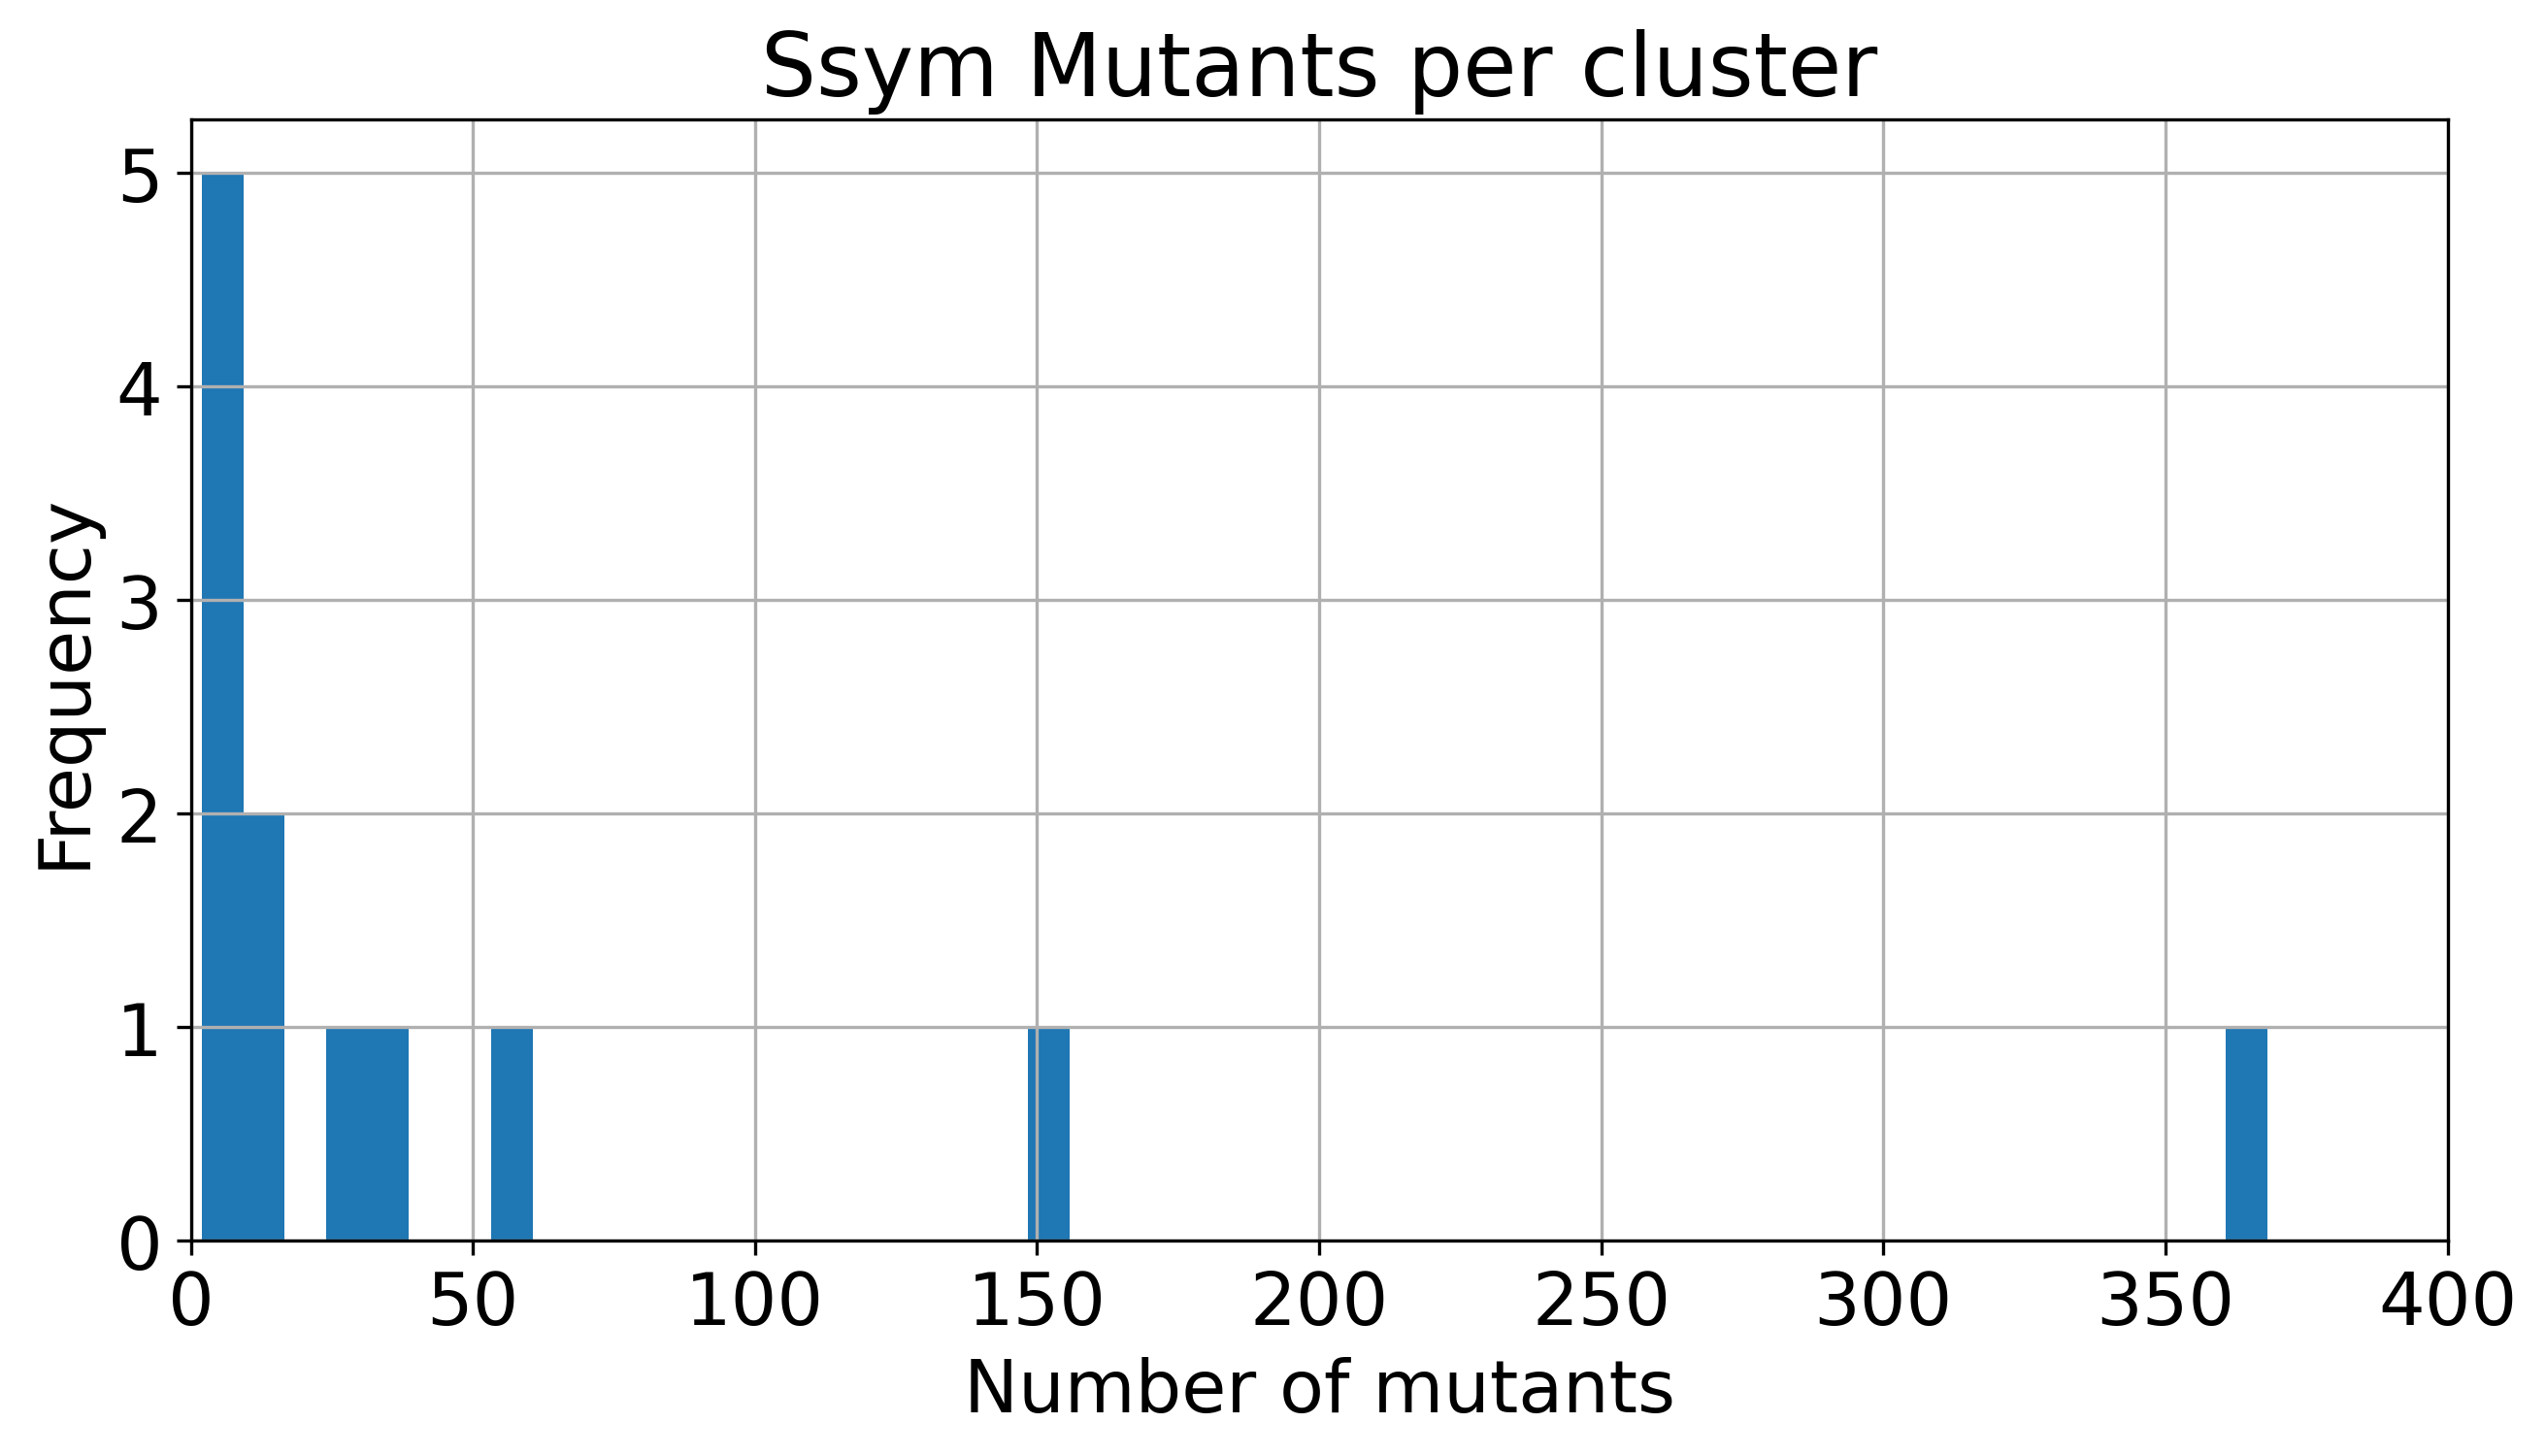

In [2]:
db_class = db

print('Original unique mutations:', len(db_class))

evolutionary = ['tranception', 'msa_transformer', 'esm1v', 'msa', 'esm2', 'ankh']
structural = ['mpnn', 'mif', 'mifst', 'esmif', 'mutcomputex']
supervised = ['MAESTRO', 'ThermoNet', 'INPS', 'PremPS', 'mCSM', 'DUET', 'ACDC', 'I-Mutant3.0', 'SAAFEC', 'MUpro', 'q3421']
untrained = ['DDGun']
potential = ['KORPM', 'PopMusic', 'SDM']
biophysical = ['cartesian_ddg', 'FoldX', 'Evo', 'Cartddg']
transfer = ['stability-oracle']
other = ['Dynamut2']

original_pred_cols = db_class.columns[db_class.columns.str.contains('|'.join(evolutionary + structural + supervised + untrained + potential + biophysical + transfer + other))]
original_pred_cols = list(original_pred_cols.drop(['reduced_msa_file', 'full_msa_file', 'tranception_dms', 'msa_weights']))
original_pred_cols = [c for c in original_pred_cols if not 'runtime' in c]
original_pred_cols = [c for c in original_pred_cols if not 'cluster' in c]
original_pred_cols = [c for c in original_pred_cols if not 'overlaps' in c]
original_pred_cols = [c for c in original_pred_cols if not 'pll' in c]

ensemble_cols = [c for c in db_class.columns if 'pslm' in c]
print(ensemble_cols)

db_stacked_runtimes = db[[c for c in db.columns if 'runtime' in c]]

original_pred_cols_reduced = deepcopy(original_pred_cols)
for col in [f'esm1v_{i}' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)
for col in [f'msa_{i}' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)

print(original_pred_cols_reduced)

db_class = db_class[original_pred_cols_reduced + ensemble_cols + ['ddG', 'cluster']]
db_class['cluster'] = db_class['cluster'].astype(int)

db_class_rescaled = db_class.copy(deep=True)
db_class_rescaled[original_pred_cols_reduced] /= db_class_rescaled[original_pred_cols_reduced].std()

db_class['mpnn_rosetta'] = db_class['cartesian_ddg'] + db_class['mpnn_20_00']
db_class['random'] = np.random.normal(loc=db['ddG'].mean(), size=len(db_class))
db_class['korpm'] = db_class['KORPM']

fig, axes = plt.subplots(1, figsize=(10, 5), dpi=300) 
db_class.groupby('cluster').count().iloc[:, 0].hist(bins=50, ax=axes)

plt.xlim([0,400])
plt.title('Ssym Mutants per cluster')
plt.xlabel('Number of mutants')
plt.ylabel('Frequency')

group_counts = db_class.groupby('cluster').count().iloc[:, 0]
print(group_counts)
large_groups = group_counts > 0
filtered_df = db_class[db_class['cluster'].isin(large_groups[large_groups].index)]
db_class = filtered_df

print(f'Detected {len(db_class.loc[db["on_interface"].astype(bool)])} interface mutations')

print('Unique mutations in chosen set:', len(db_class))
print('Unique clusters (protein families with significant structural homology):', len(db_class['cluster'].unique()))

db_class

In [3]:
# compute statistics on the results for use by later methods
class_result = analysis_utils.compute_stats_bidirectional(db_class, stats=(), grouper='cluster', stacked=True)
class_result.to_csv('../data/extended/ssym_extended.csv')

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

### Main Figure 1b

In [4]:
db_class_ = db_class.copy(deep=True)
new_index = db_class_.reset_index()
new_index = new_index['uid'] + '_' + new_index['direction']
db_class_.index = new_index
db_class_.columns = [c+'_dir' for c in db_class_.columns]
db_class_ = db_class_.rename({'cluster_dir': 'cluster'}, axis=1)
db_class_['ddG'] = db_class_['ddG_dir']
db_class_['code'] = db_class_.index.str[:4]
db_class_
summ = analysis_utils.compute_stats(db_class_.drop('code', axis=1), 
                                    stats=('n', 'accuracy', 'MCC', 'pred_positives', 'tp', 'auprc', 'spearman', 'ndcg', 'mean_t1s', 'mean_stabilization', 'net_stabilization', 'sensitivity', 'recall@k0.0', 'recall@k1.0', 'mean_reciprocal_rank', 'fractional_gain', 'PPV'), 
                                    measurements=['ddG'], grouper='cluster', n_classes=2, n_bootstraps=100, quiet=True)
tmp1 = summ.reset_index()
tmp1.to_csv('../data/extended/ssym_extended_bootstrapped.csv')

mpnn_rosetta
KORPM
stability-oracle
cartesian_ddg
mpnn_20_00
DDGun3D
INPS3D
esm2_650M
random


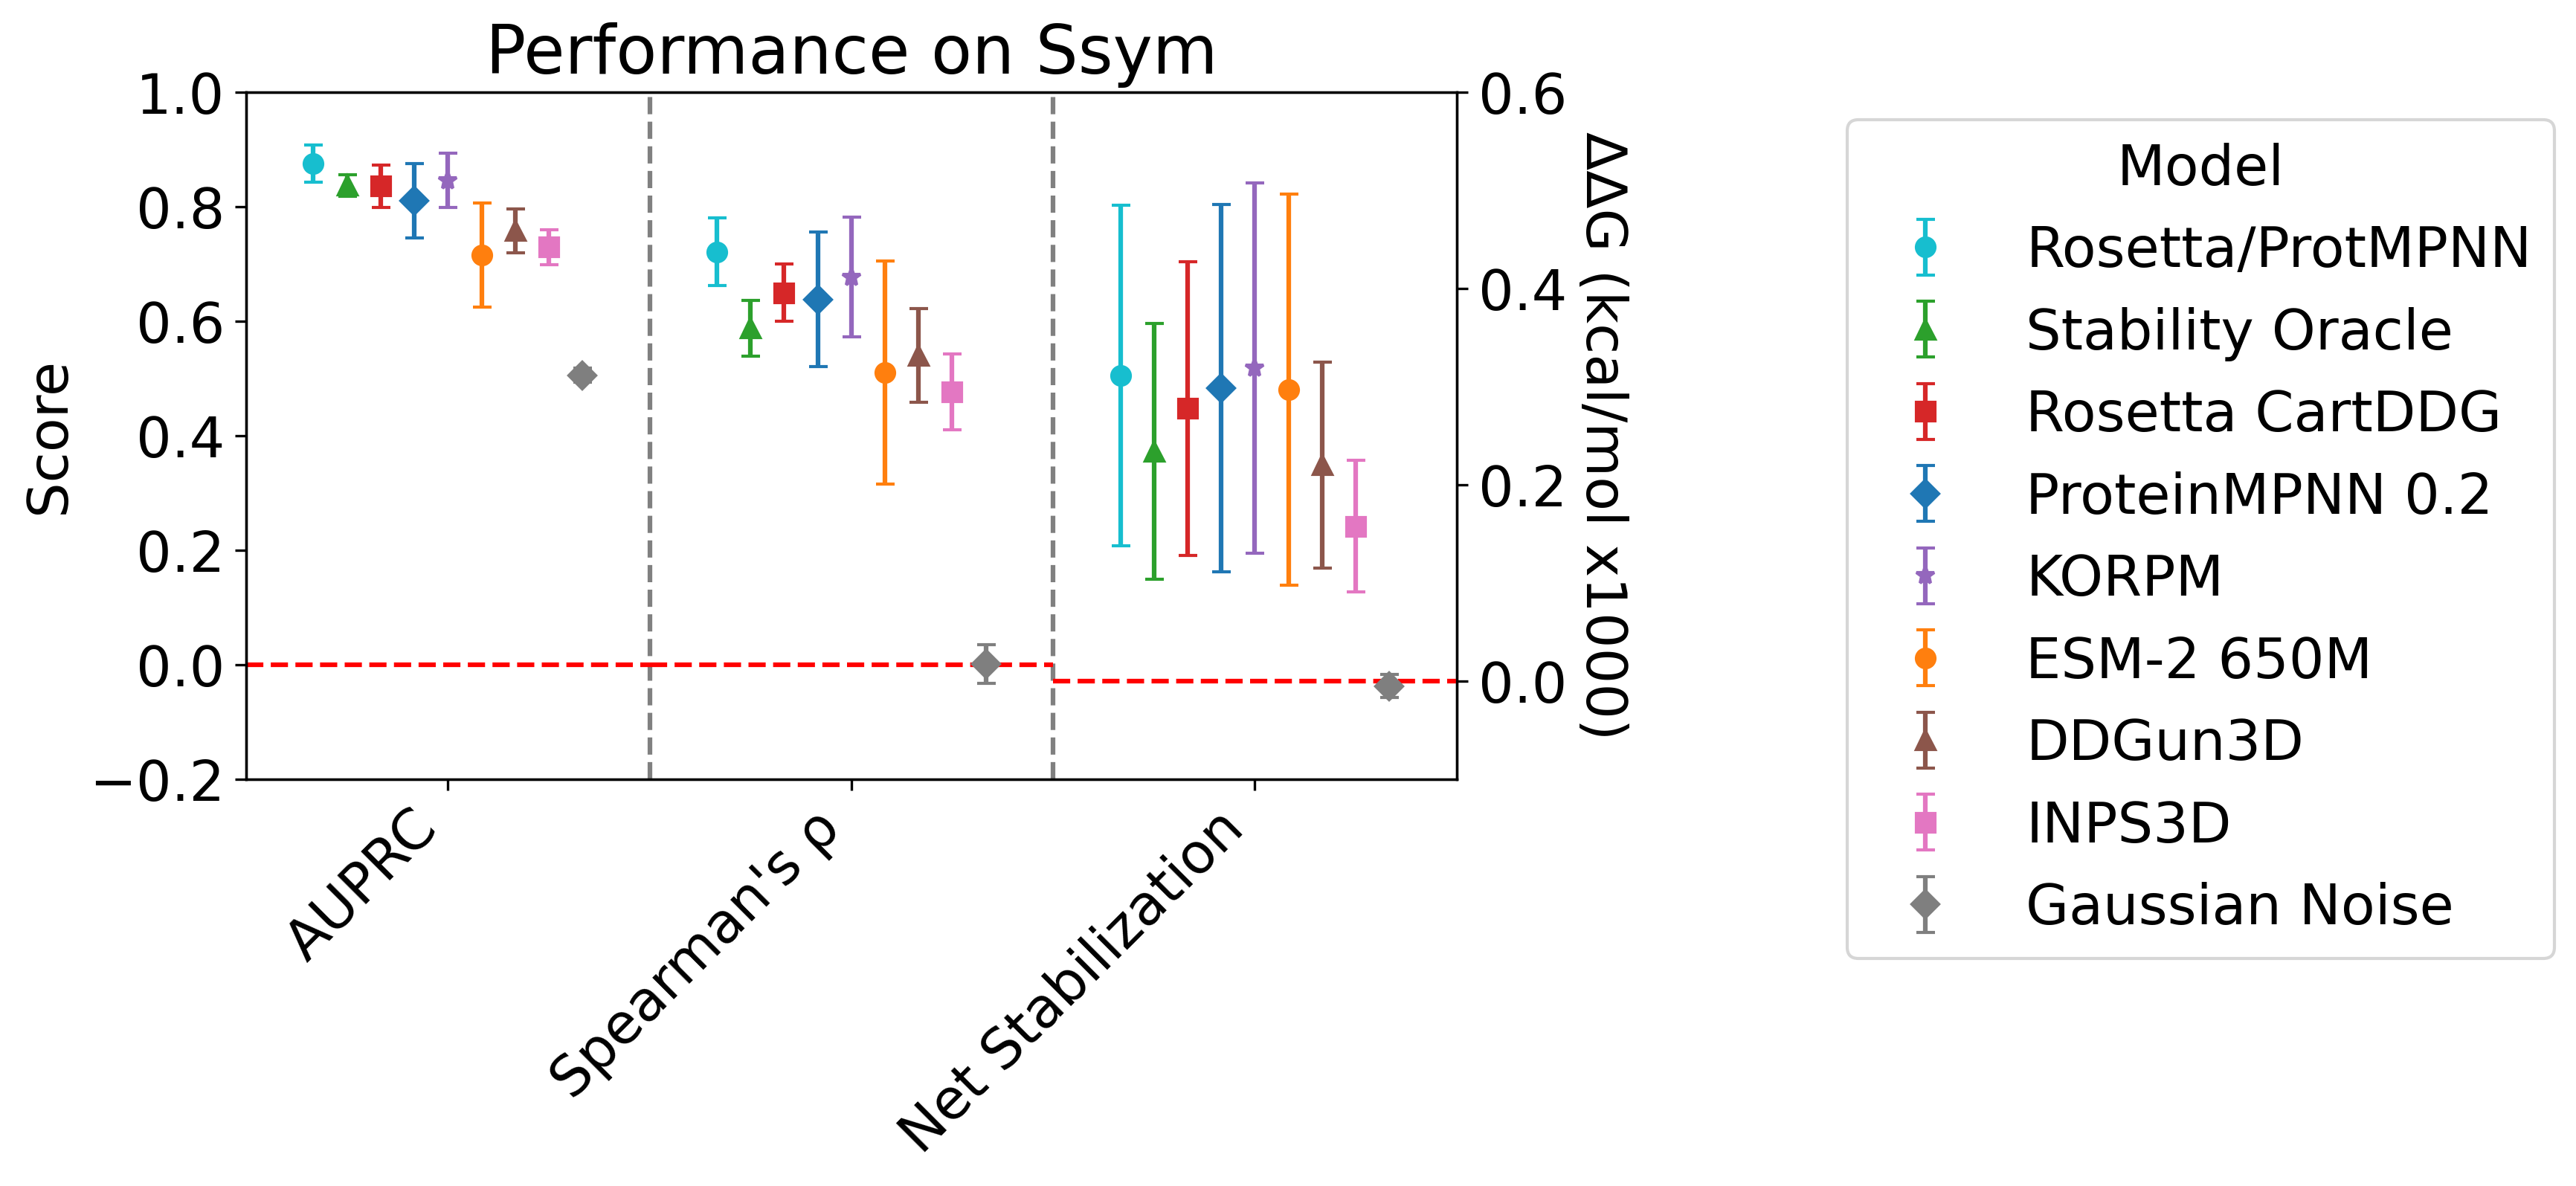

In [5]:
import importlib
importlib.reload(analysis_utils)

s2 = tmp1.sort_values('auprc_mean', ascending=False).dropna(how='all', axis=1).reset_index()
s3 = s2.loc[s2['model'].isin([c+'_dir' for c in original_pred_cols_reduced] + [
            'random_dir', 
            'ddG_dir', 
            'K1566_pslm_rfa_2_dir', 
            'K1566_pslm_rfa_3_dir', 
            'K1566_pslm_rfa_4_dir',
            'K1566_pslm_rfa_5_dir',
            'K1566_pslm_rfa_6_dir',
            'K1566_pslm_rfa_7_dir',
            'mpnn_rosetta_dir'])
            ].drop('measurement', axis=1)
plot_cols = ['auprc', 'spearman','net_stabilization']
plot_models = ['mpnn_rosetta', 'stability-oracle', 'cartesian_ddg', 'mpnn_20_00', 'KORPM', 'esm2_650M', 'DDGun3D', 'INPS3D', 'random']
plot_title = 'Ssym'
y_lim = (-0.2, 1)
right_y_lim = (-.1, .6)
table_cols = ['auprc', 'spearman','net_stabilization', 'MCC', 'sensitivity', 'recall@k1.0']
saveloc = '../data/extended/ssym_extended_bootstrapped_formatted.csv'
out = analysis_utils.bootstrap_table(s3, 
                plot_cols,
                plot_models, 
                plot_title,
                y_lim,
                right_y_lim,
                table_cols, 
                var_cols=['net_stabilization'], 
                sort_col='auprc',
                saveloc=saveloc)
#out

### Extended Data Table

In [6]:
table1 = class_result #.loc[:,['n', 'MCC', 'auprc', 'spearman', 'weighted_ndcg', 'weighted_auprc', 'weighted_spearman']]
table = table1.sort_values(['direction', 'weighted_spearman'], ascending=False).reset_index()

for source, target in remap_names.items():
    table.loc[table['model']==source, 'model'] = target
#table['model'] = table['model'].map(remap_names)
table.loc[table['model'].isin(['Gaussian noise', 'ΔΔG label']), 'model_type'] = 'control'

remap_cols = {'auprc': 'AUPRC', 'spearman': 'Spearman\'s ρ', 'auppc': 'mean PPC', 'aumsc': 'mean MSC', 'weighted_ndcg': 'wNDCG', 'recall@k1.0': 'Recall @ k',
    'weighted_spearman': 'wρ', 'weighted_auprc': 'wAUPRC', 'tp': 'True Positives', 'sensitivity': 'Sensitivity', 'antisymmetry': 'Antisymmetry', 'bias': 'Bias',
    'net_stabilization': 'Net Stabilization', 'accuracy': 'Accuracy', 'pearson': 'Pearson', 'PPV': 'PPV', 'mean_reciprocal_rank': 'MRR'}
table = table.rename(remap_cols, axis=1)
#table = table[['direction', 'model_type', 'model', 'n', 'MCC', 'AUPRC', 'ρ', 'wNDCG', 'wAUPRC', 'wρ', 'mean_t1s', 'Net Stabilization',
#    'mean_stabilization', 'mean PPC', 'mean MSC', 'True Positives', 'Sensitivity', 'Accuracy', 'Pearson']]
table = table.rename({'direction': 'Direction', 'model_type': 'Model Type', 'model': 'Model'}, axis=1)

#'auprc', 'spearman','net_stabilization', 'MCC', 'sensitivity', 'recall@k1.0'
#table = table[['Direction', 'Model Type', 'Model', 'n', 'Spearman\'s ρ', 'Sensitivity', 'PPV', 'Antisymmetry', 'Bias']]
table = table[['Direction', 'Model Type', 'Model', 'AUPRC', 'Spearman\'s ρ', 'Net Stabilization', 'MCC', 'Sensitivity', 'Recall @ k', 'MRR', 'Antisymmetry', 'Bias']]

table = table.loc[~table['Model'].str.contains('K1566')]
table = table.dropna(subset='Model').set_index(['Direction', 'Model Type', 'Model']).astype(float).round(3).drop_duplicates()

t = table.xs('combined').sort_values('AUPRC', ascending=False).applymap(analysis_utils.format_fixed_total_digits)
t.to_csv('../data/extended/ssym_formatted_extended.csv', encoding='utf-8-sig')
t

AUPRC Spearman's ρ Net Stabilization   MCC  \
Model Type   Model                                                              
control      ΔΔG label              1.00         1.00               453  1.00   
supervised   PremPS                 0.91         0.84               385  0.65   
ensemble     Rosetta/ProtMPNN       0.89         0.74               324  0.58   
potential    KORPM                  0.86         0.71               333  0.56   
biophysical  Rosetta CartDDG        0.85         0.67               288  0.50   
transfer     Stability Oracle       0.84         0.61               243  0.52   
structural   ProteinMPNN 0.3        0.84         0.69               328  0.55   
ensemble     Ensemble 4 Feats       0.84         0.69               319  0.52   
structural   ProteinMPNN 0.2        0.83         0.69               310  0.53   
ensemble     Ensemble 5 Feats       0.83         0.68               327  0.53   
             Ensemble 6 Feats       0.82         0.69               332  0.54   
             Ensemble 7 Feats       0.82         0.68               330  0.53   
structural   ProteinMPNN 0.1        0.82         0.65               286  0.50   
NaN          Cartddg                0.82         0.63               265  0.48   
transfer     ACDC-NN                0.81         0.62               265  0.40   
ensemble     Ensemble 3 Feats       0.80         0.63               301  0.48   
structural   MutComputeX            0.80         0.47               192  0.42   
             MIF                    0.79         0.59               271  0.43   
transfer     ACDC-NN-Seq            0.79         0.57               209  0.33   
ensemble     Ensemble 2 Feats       0.78         0.63               313  0.47   
supervised   INPS-Seq               0.77         0.54               229  0.30   
evolutionary ESM-2 15B              0.77         0.60               326  0.47   
untrained    DDGun3D                0.77         0.55               227  0.36   
structural   MIF-ST                 0.76         0.60               301  0.46   
untrained    DDGun                  0.76         0.54               233  0.34   
biophysical  EvoEF                  0.76         0.48               200  0.31   
             FoldX                  0.75         0.51               236  0.37   
evolutionary MSA-T median           0.75         0.59               333  0.47   
             ESM-2 3B               0.75         0.57               328  0.47   
             MSA-T mean             0.74         0.59               331  0.44   
             ESM-2 650M             0.74         0.58               310  0.46   
supervised   I-Mutant3.0-Seq        0.74         0.41              97.0  0.29   
structural   ESM-IF                 0.73         0.55               258  0.39   
evolutionary Tranception            0.73         0.57               326  0.47   
supervised   INPS3D                 0.73         0.46               163  0.30   
evolutionary Tranception (reduced)  0.73         0.57               326  0.47   
             Ankh                   0.73         0.58               331  0.45   
supervised   DUET                   0.70         0.38               126  0.27   
             MAESTRO                0.70         0.40               106  0.23   
             ThermoNet              0.70         0.41               157  0.24   
             I-Mutant3.0            0.69         0.36              62.4  0.23   
potential    SDM                    0.68         0.30               113  0.26   
evolutionary ESM-2 150M             0.67         0.45               245  0.34   
supervised   MUpro                  0.67         0.36              62.6  0.26   
evolutionary ESM-1V mean            0.67         0.45               246  0.33   
             ESM-1V median          0.66         0.45               248  0.32   
supervised   mCSM                   0.65         0.33              59.3  0.15   
unknown      Dynamut2               0.62         0.29             

In [7]:
zs_feats = ['delta_kdh', 'delta_vol', 'rel_ASA']
#red_cols = [c[:-4] for c in original_pred_cols_reduced]

#models = original_pred_cols_reduced + [c + '_dir' for c in zs_feats]
#models += [c.replace('_dir', '_inv') for c in models]
#print(models)
models = list(db_class.columns)

db_ens = db_class.copy(deep=True)
db_ens = db_ens[models]

print(len(db_ens))
db_ens['random'] = np.random.rand(len(db_ens)) - 0.5
#db_ens['random_inv'] = np.random.rand(len(db_ens)) - 0.5
#db_ens = db_ens.drop(['KORPMD_dir', 'CartddgD_dir', 'FoldXD_dir', 'EvoD_dir', 'Dyna2D_dir', 'PopMsD_dir', 'DDGunD_dir', 'TNetD_dir', 'ACDCNND_dir'], axis=1)
dfm = db_ens.copy(deep=True)

def unstack_frames(df):
    df_dir = df.xs('dir')
    df_dir.columns = [c + '_dir' for c in df_dir.columns]
    df_inv = df.xs('inv')
    df_inv.columns = [c + '_inv' for c in df_inv.columns]
    return df_dir.join(df_inv)
dfu = unstack_frames(dfm)

weights = [1, 0.5, 0.2]
#weights2 = [0.8, 0.3]

all_cols = []

tmp = []
for model1 in models:
    for model2 in models:
        if model1 != model2: #(model1.split('_')[0] != model2.split('_')[0]) and (model1[:4] != model2[:4]) and
            for weight in weights:
                tmp.append(pd.Series(dfm[model1]/dfm[model1].std() + dfm[model2]/dfm[model2].std() * weight, name=f'{model1} + {model2} * {weight}'))
                all_cols.append(f'{model1} + {model2} * {weight}')
                #for model3 in models:
                #    if model2 != model3 and model1 != model3:
                #        for weight2 in weights2:
                #            tmp.append(pd.Series(dfm[model1] + dfm[model2] * weight + dfm[model3] * weight2, name=f'{model1} + {model2} * {weight} + {model3} * {weight2}'))
                #            all_cols.append(f'{model1} + {model2} * {weight} + {model3} * {weight2}')

dfm = pd.concat([dfm] + tmp, axis=1)
#dfm = dfm.join(db_stacked_runtimes)
dfm
#dfm.to_csv(os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_preds.csv'))
#dfm

684


ACDC-NN  ACDC-NN-Seq  Cartddg  DDGun  DDGun3D  \
direction uid       uid2                                                        
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00    0.9      0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74   -1.0     -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22    0.2     -0.5   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98   -0.2      0.4   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00    1.1      1.0   
...                                 ...          ...      ...    ...      ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56    4.5      3.6   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00   -2.1     -1.9   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24    2.1      1.5   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00   -5.3     -4.4   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98    5.3      3.7   

                                DUET  Dynamut2   Evo     FoldX  I-Mutant3.0  \
direction uid       uid2                                                      
dir       1AMQ_191F 1AMQ_180F -0.992     -1.34 -0.43 -3.458090         0.03   
inv       1AMQ_191F 1AMQ_180F -1.735     -2.07 -0.16 -1.167050        -0.68   
dir       1AMQ_191S 1AMQ_180S -1.717     -2.18 -1.18  0.178326        -0.09   
inv       1AMQ_191S 1AMQ_180S -0.375     -1.60  0.92 -0.117104        -0.29   
dir       1AMQ_191W 1AMQ_180W -1.495     -1.75  0.24 -6.466620         0.09   
...                              ...       ...   ...       ...          ...   
inv       5PTI_35G  5PTI_35G  -1.774     -0.55  0.81 -2.330370        -0.96   
dir       5PTI_43G  5PTI_43G  -2.580     -3.05 -3.00 -1.977350        -2.67   
inv       5PTI_43G  5PTI_43G  -0.450     -0.56  1.96 -0.783265        -1.13   
dir       5PTI_45A  5PTI_45A  -3.734     -3.22 -3.35 -3.351550        -2.60   
inv       5PTI_45A  5PTI_45A  -1.081     -0.88  2.10  3.440730        -0.77   

                               ...  korpm + ddG * 0.2  korpm + cluster * 1  \
direction uid       uid2       ...                                           
dir       1AMQ_191F 1AMQ_180F  ...          -1.950774            -0.671644   
inv       1AMQ_191F 1AMQ_180F  ...           1.765847             2.695090   
dir       1AMQ_191S 1AMQ_180S  ...          -1.605759            -0.293826   
inv       1AMQ_191S 1AMQ_180S  ...           0.779339             1.675779   
dir       1AMQ_191W 1AMQ_180W  ...          -2.004942            -0.474329   
...                            ...                ...                  ...   
inv       5PTI_35G  5PTI_35G   ...           0.269752             0.459176   
dir       5PTI_43G  5PTI_43G   ...          -1.701831            -0.342469   
inv       5PTI_43G  5PTI_43G   ...           1.504517             1.617404   
dir       5PTI_45A  5PTI_45A   ...          -2.523198            -1.032627   
inv       5PTI_45A  5PTI_45A   ...           1.888783             1.870462   

                               korpm + cluster * 0.5  korpm + cluster * 0.2  \
direction uid       uid2                                                      
dir       1AMQ_191F 1AMQ_180F              -1.223737              -1.554993   
inv       1AMQ_191F 1AMQ_180F               2.142997               1.811741   
dir       1AMQ_191S 1AMQ_180S              -0.845920              -1.177176   
inv       1AMQ_191S 1AMQ_180S               1.123686               0.792430   
dir       1AMQ_191W 1AMQ_180W              -1.026422              -1.357678   
...                                              ...                    ...   
inv       5PTI_35G  5PTI_35G                0.091114              -0.129723   
dir       5PTI_43G  5PTI_43G               -0.710531              -0.931369   
inv       5PTI_43G  5PTI_43G                1.249341               1.028504   
dir       5PTI_45A  5PTI_45A               -1.400689              

In [8]:
def get_summary_df(db_complete, cols=None, saveloc=os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_results.csv'), stats=(), stacked=False):

    assert os.path.exists(os.path.dirname(saveloc))
    #assert not os.path.exists(saveloc)
    #if cols is None:
    #    cols = db_complete.columns.drop(['code'])#, 'ddG_dir', 'ddG_inv'])

    if not stacked:
        db_stacked = analysis_utils.stack_frames(db_complete)
    else:
        db_stacked = db_complete
    #db_stacked['code'] = list(db_stacked.reset_index()['uid'].str[:4])
    #print(db_stacked)

    df_summ = analysis_utils.compute_stats_bidirectional(db_stacked, stacked=True, stats=(), grouper='cluster', directions=['dir', 'inv']).reset_index().set_index(['direction', 'model'])#.join(df_reg) #.drop('n_total', axis=1))
    df_summ = df_summ.reset_index().rename({'index': 'model'}, axis=1).set_index(['direction', 'model_type', 'model', 'class'])
    df_summ = df_summ.sort_index(level=1).sort_index(level=0)#.drop_duplicates()
    df_summ.to_csv(saveloc)
    return df_summ

In [9]:
# takes a long time to compute and has already been done
#d1 = get_summary_df(dfm, saveloc=os.path.join(path, 'data', 'pairwise', 'pairwise_ssym_combinations_3_weights.csv'), stats=(), stacked=True) 

d1 = pd.read_csv(os.path.join(path, 'data', 'pairwise', 'pairwise_ssym_combinations_3_weights.csv')).set_index(['direction', 'model_type', 'model', 'class'])

In [10]:
dfu_ = dfu.join(db_stacked_runtimes)
dfu_

ACDC-NN_dir  ACDC-NN-Seq_dir  Cartddg_dir  \
uid       uid2      direction                                              
1AMQ_191F 1AMQ_180F dir           0.155387         0.000000        -8.00   
                    inv           0.155387         0.000000        -8.00   
1AMQ_191S 1AMQ_180S dir          -0.310174         0.000000        -4.22   
                    inv          -0.310174         0.000000        -4.22   
1AMQ_191W 1AMQ_180W dir           0.175478         0.000235        -8.00   
...                                    ...              ...          ...   
5PTI_35G  5PTI_35G  inv          -3.815977        -3.124952        -8.00   
5PTI_43G  5PTI_43G  dir          -1.785572        -1.548846        -8.00   
                    inv          -1.785572        -1.548846        -8.00   
5PTI_45A  5PTI_45A  dir          -3.439780        -3.219905        -8.00   
                    inv          -3.439780        -3.219905        -8.00   

                               DDGun_dir  DDGun3D_dir  DUET_dir  Dynamut2_dir  \
uid       uid2      direction                                                   
1AMQ_191F 1AMQ_180F dir              0.9          0.9    -0.992         -1.34   
                    inv              0.9          0.9    -0.992         -1.34   
1AMQ_191S 1AMQ_180S dir              0.2         -0.5    -1.717         -2.18   
                    inv              0.2         -0.5    -1.717         -2.18   
1AMQ_191W 1AMQ_180W dir              1.1          1.0    -1.495         -1.75   
...                                  ...          ...       ...           ...   
5PTI_35G  5PTI_35G  inv             -4.5         -4.4    -4.156         -3.94   
5PTI_43G  5PTI_43G  dir             -2.1         -1.9    -2.580         -3.05   
                    inv             -2.1         -1.9    -2.580         -3.05   
5PTI_45A  5PTI_45A  dir             -5.3         -4.4    -3.734         -3.22   
                    inv             -5.3         -4.4    -3.734         -3.22   

                               Evo_dir  FoldX_dir  I-Mutant3.0_dir  ...  \
uid       uid2      direction                                       ...   
1AMQ_191F 1AMQ_180F dir          -0.43  -3.458090             0.03  ...   
                    inv          -0.43  -3.458090             0.03  ...   
1AMQ_191S 1AMQ_180S dir          -1.18   0.178326            -0.09  ...   
                    inv          -1.18   0.178326            -0.09  ...   
1AMQ_191W 1AMQ_180W dir           0.24  -6.466620             0.09  ...   
...                                ...        ...              ...  ...   
5PTI_35G  5PTI_35G  inv          -4.04  -3.672690            -3.03  ...   
5PTI_43G  5PTI_43G  dir          -3.00  -1.977350            -2.67  ...   
                    inv          -3.00  -1.977350            -2.67  ...   
5PTI_45A  5PTI_45A  dir          -3.35  -3.351550            -2.60  ...   
                    inv          -3.35  -3.351550            -2.60  ...   

                               runtime_msa_1  runtime_msa_2  runtime_msa_3  \
uid       uid2      direction                                                
1AMQ_191F 1AMQ_180F dir             3.422021       3.423559       3.534027   
                    inv             3.396734       3.396029       3.400826   
1AMQ_191S 1AMQ_180S dir             3.398933       3.394464       3.398379   
                    inv             3.387094       3.416658       3.419749   
1AMQ_191W 1AMQ_180W dir             3.396502       3.396971       3.398093   
...                                      ...            ...            ...   
5PTI_35G  5PTI_35G  inv             0.880128       0.880030       0.880435   
5PTI_43G  5PTI_43G  dir             0.881322       0.880291       0.880465   
                    inv             0.879922       0.879977       0.880127   
5PTI_45A  5PTI_45A  dir             0.881539       0.880005       0.881965   
                    inv             0.883585       0.882248       0.881539  

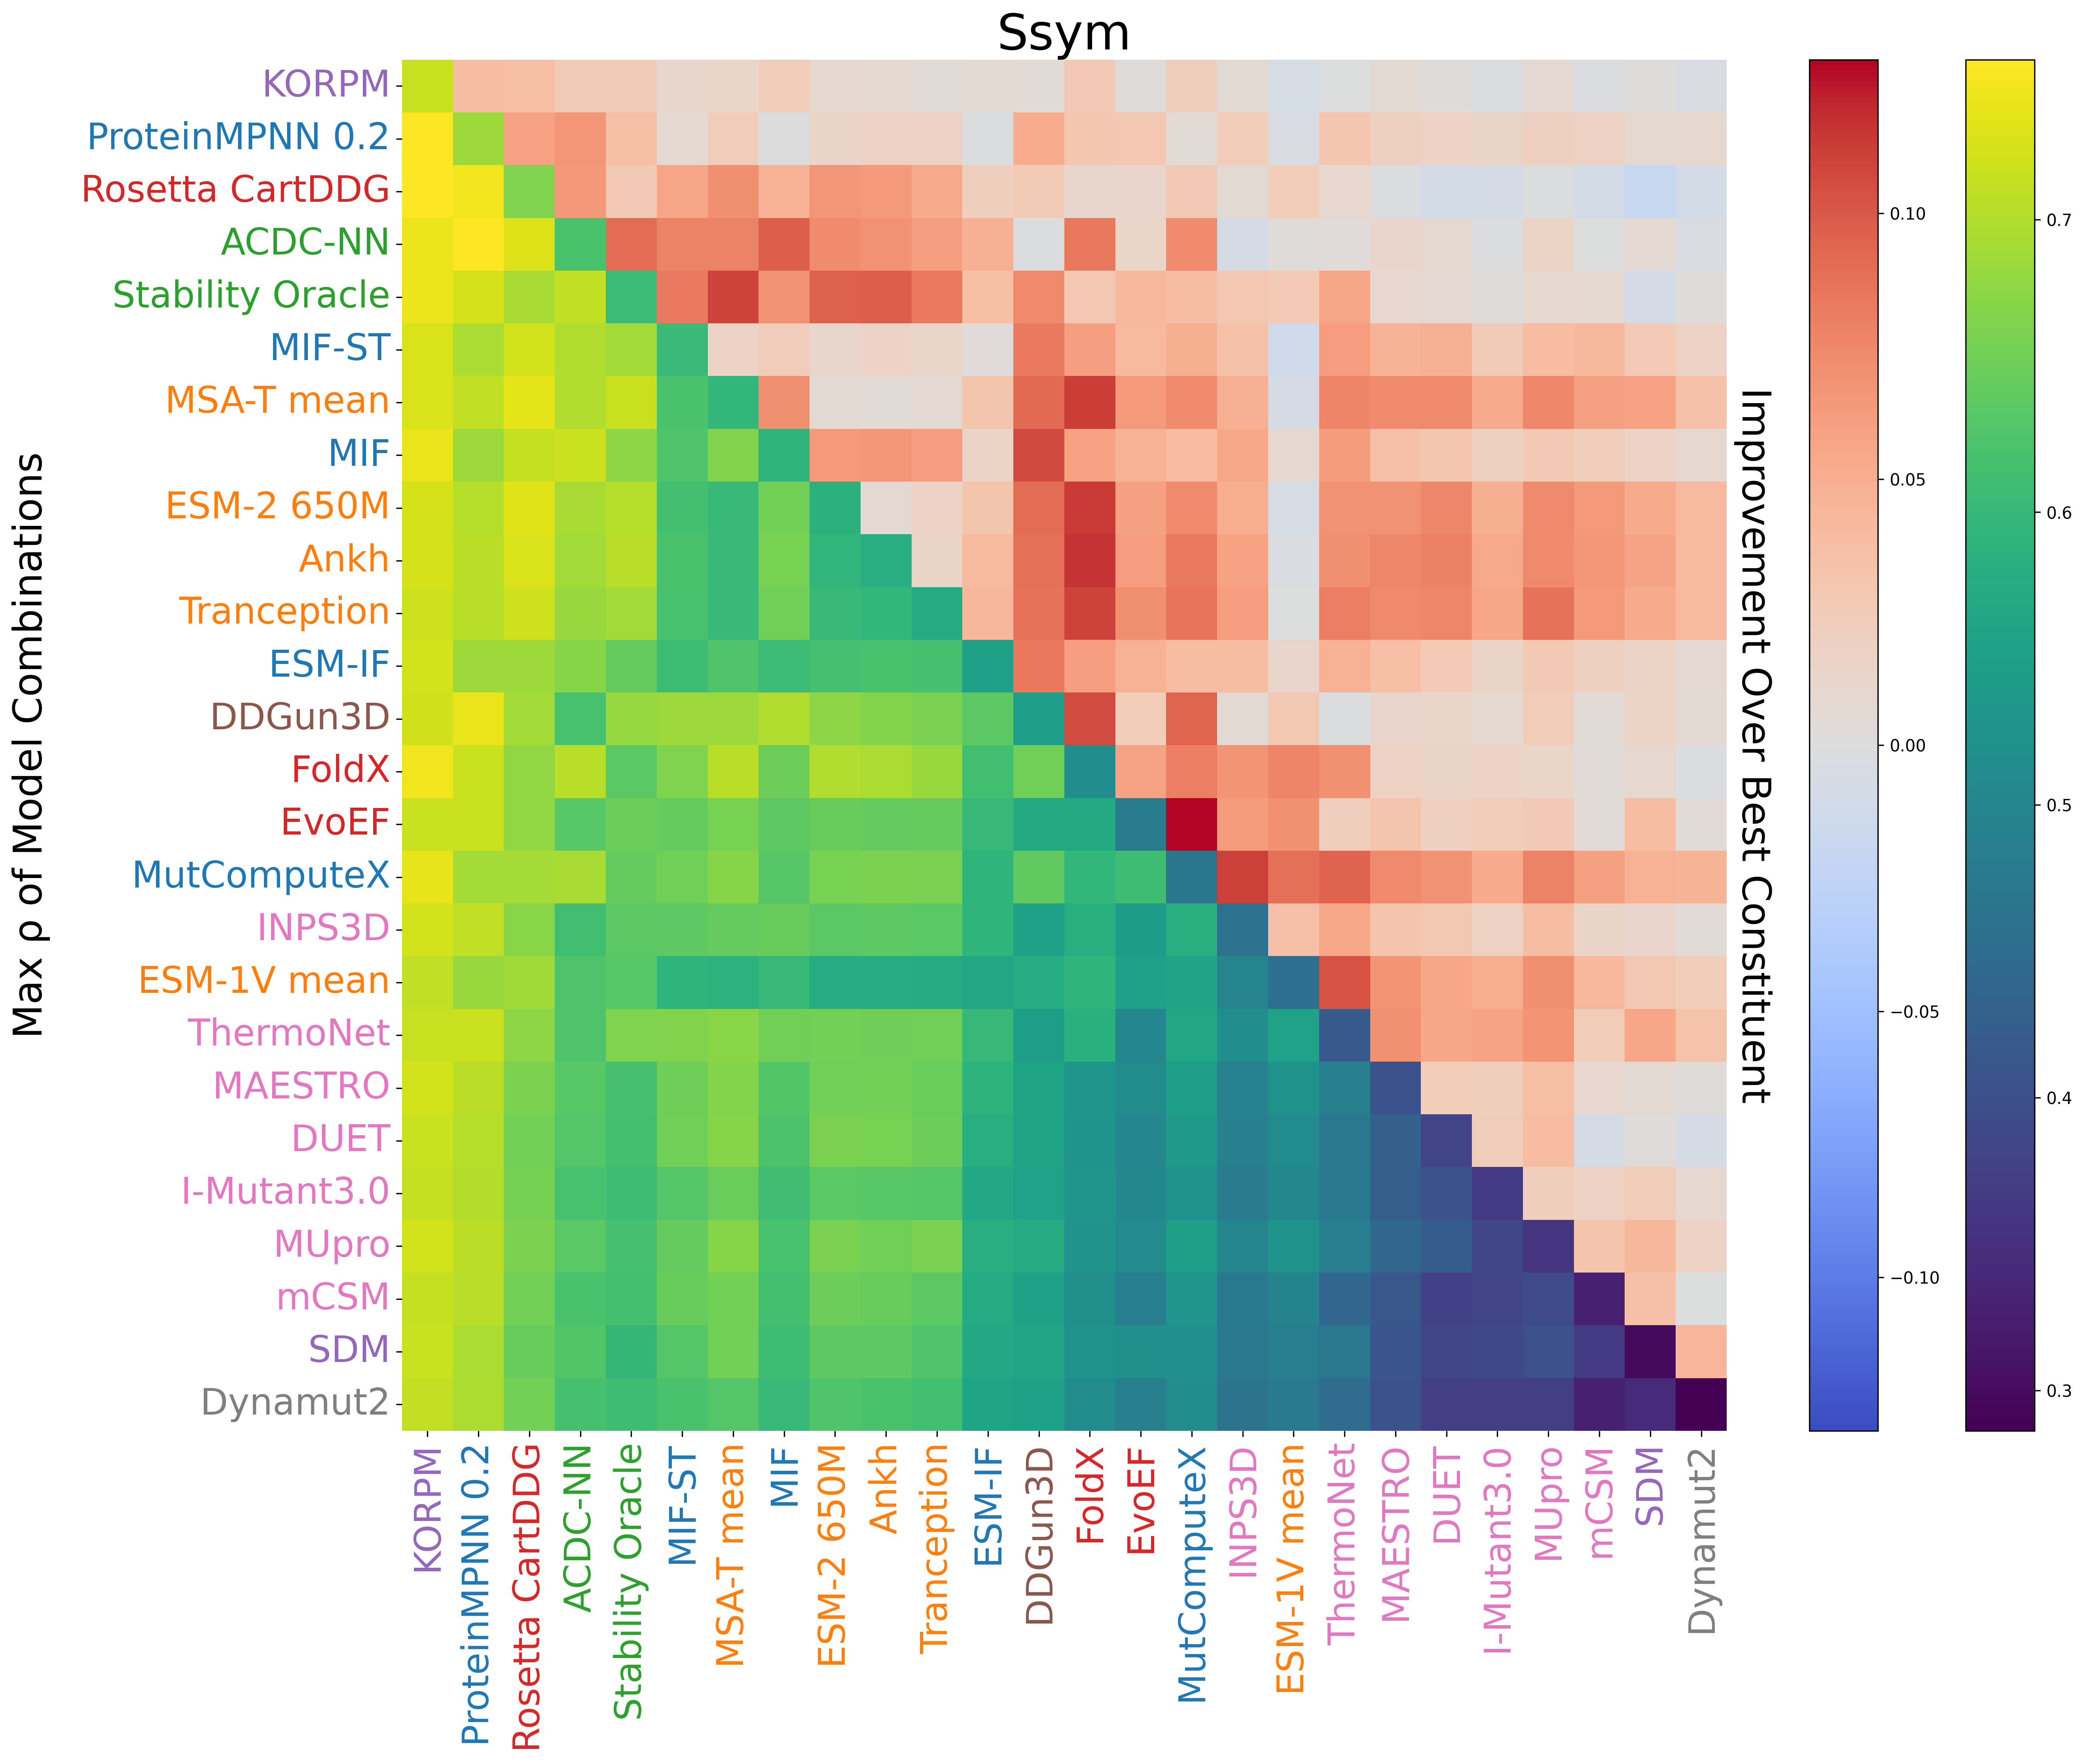

Base model       Added Model  Weight  Spearman's rho  \
Rank                                                              
1               KORPM   ProteinMPNN 0.2     0.5            0.75   
2             ACDC-NN   ProteinMPNN 0.2     1.0            0.75   
3               KORPM   Rosetta CartDDG     1.0            0.75   
4     Rosetta CartDDG   ProteinMPNN 0.2     1.0            0.75   
5               KORPM             FoldX     0.5            0.74   
6               KORPM           ACDC-NN     0.5            0.74   
7               KORPM  Stability Oracle     0.5            0.74   
8               KORPM               MIF     0.5            0.74   
9     ProteinMPNN 0.2           DDGun3D     0.5            0.74   
10              KORPM       MutComputeX     0.2            0.74   
11    Rosetta CartDDG        MSA-T mean     0.5            0.74   
12    Rosetta CartDDG        ESM-2 650M     0.5            0.73   
13            ACDC-NN   Rosetta CartDDG     1.0            0.73   
14              KORPM        MSA-T mean     0.2            0.73   
15    Rosetta CartDDG              Ankh     0.5            0.73   
16              KORPM            MIF-ST     0.2            0.73   
17    ProteinMPNN 0.2  Stability Oracle     0.5            0.72   
18              KORPM        ESM-2 650M     0.2            0.72   
19              KORPM              Ankh     0.2            0.72   
20              KORPM             MUpro     0.2            0.72   
21              KORPM            ESM-IF     0.2            0.72   
22              KORPM            INPS3D     0.2            0.72   
23    Rosetta CartDDG            MIF-ST     0.5            0.72   
24              KORPM           MAESTRO     0.2            0.72   
25              KORPM           DDGun3D     0.2            0.72   
26              KORPM       Tranception     0.2            0.72   
27    Rosetta CartDDG       Tranception     0.5            0.72   
28              KORPM             EvoEF     0.2            0.72   
29              KORPM              DUET     0.2            0.72   
30            ACDC-NN               MIF     0.5            0.72   

      Model Correlation  CPU time (s)  GPU time (s)  
Rank                                                 
1                  0.71          -0.0          5.98  
2                  0.58          -0.0          5.98  
3                  0.66      125192.0         -0.00  
4                  0.63      125192.0          5.98  
5                  0.45          -0.0         -0.00  
6                  0.68          -0.0         -0.00  
7                  0.62          -0.0         -0.00  
8                  0.59          -0.0          6.58  
9                  0.47          -0.0          5.98  
10                 0.45          -0.0         -0.00  
11                 0.44      125192.0       4845.43  
12                 0.42      125192.0         31.94  
13                 0.60      125192.0         -0.00  
14                 0.66          -0.0       4845.43  
15                 0.43      125192.0         71.78  
16                 0.67          -0.0         21.79  
17                 0.59          -0.0          5.98  
18                 0.66          -0.0         31.94  
19                 0.67          -0.0         71.78  
20                 0.33          -0.0         -0.00  
21                 0.59          -0.0         87.41  
22                 0.55          -0.0         -0.00  
23                 0.51      125192.0         21.79  
24                 0.41          -0.0         -0.00  
25                 0.68          -0.0         -0.00  
26                 0.69          -0.0      11376.87  
27                 0.45      125192.0      11376.87  
28                 0.57          -0.0         -0.00  
29                 0.41          -0.0         -0.00  
30                 0.49          -0.0          6.58

In [11]:
subset = [#'ACDC-NN-Seq', 
        'ACDC-NN', 
        #'DDGun'
        'DDGun3D',
        'DUET',
        'Dynamut2',
        'FoldX',
        'Evo',
        'I-Mutant3.0',
        #'I-Mutant3.0-Seq',
        #'INPS-Seq',
        'INPS3D',
        'MAESTRO',
        'MUpro',
        'PopMusic',
        #'PremPS',
        'ThermoNet',
        'SAAFEC-Seq',
        'SDM',
        'mCSM',
        'cartesian_ddg',
        'esm1v_mean',
        'esm2_650M',
        'ankh',
        'msa_transformer_mean',
        'tranception_weights',
        'esmif_multimer',
        'KORPM',
        'mpnn_20_00',
        'mif',
        'mifst',
        'stability-oracle',
        'mutcomputex'
        #'SOL_ACC',
        #'delta_kdh',
        #'delta_vol',
        #'abs_ASA',
        ]

direction = 'combined'
statistic = 'spearman'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym')
stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
#out = stat_df.head(30)
#models = set(list(out['model1']) + list(out['model2']))
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
#stat_df_.to_csv('../data/stat_df_s461.csv')
stat_df_.head(30)
#stat_df

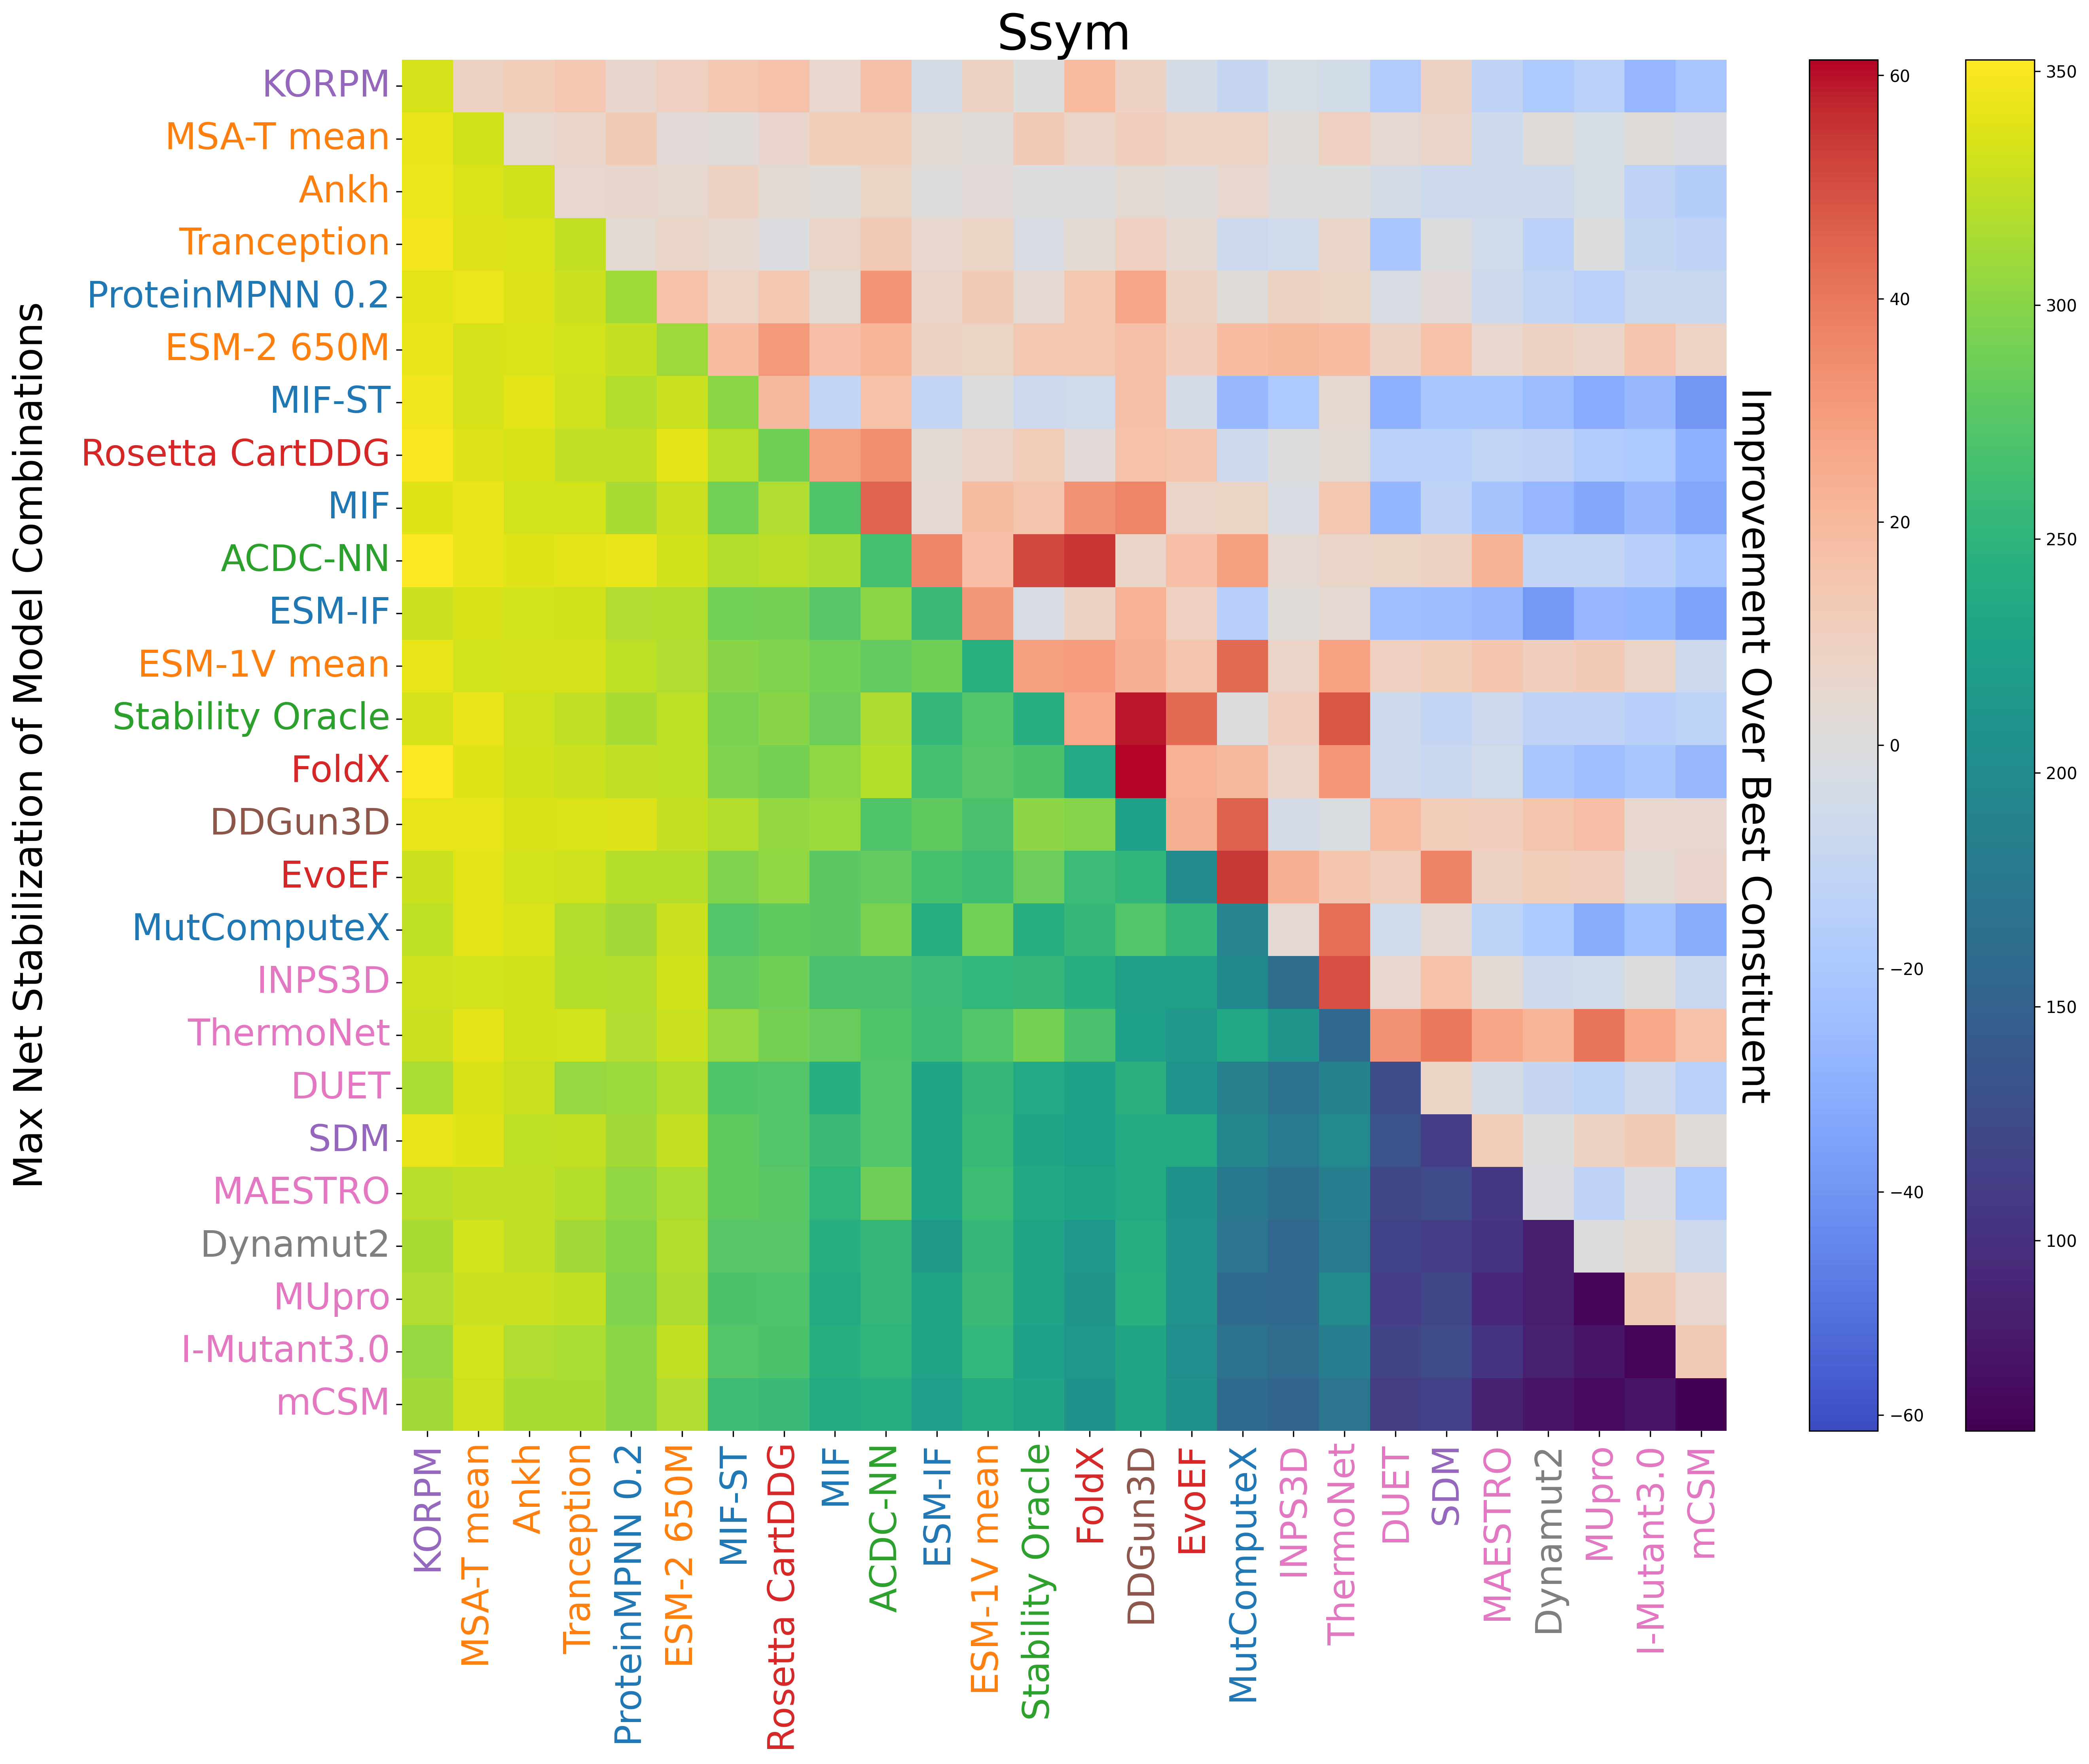

Base model       Added Model  Weight  Net Stabilization  \
Rank                                                                 
1               KORPM             FoldX     0.5             352.48   
2               KORPM           ACDC-NN     0.2             350.40   
3               KORPM   Rosetta CartDDG     0.5             349.91   
4               KORPM       Tranception     0.2             347.15   
5               KORPM            MIF-ST     0.2             346.70   
6               KORPM              Ankh     0.2             344.35   
7          MSA-T mean   ProteinMPNN 0.2     0.5             343.50   
8          MSA-T mean  Stability Oracle     0.5             343.29   
9             ACDC-NN        MSA-T mean     1.0             343.16   
10              KORPM        ESM-2 650M     0.5             342.85   
11         MSA-T mean               MIF     0.5             342.51   
12            ACDC-NN   ProteinMPNN 0.2     1.0             342.34   
13              KORPM           DDGun3D     0.2             342.12   
14              KORPM        MSA-T mean     0.2             341.85   
15              KORPM               SDM     0.2             341.82   
16              KORPM       ESM-1V mean     0.2             341.74   
17            DDGun3D        MSA-T mean     1.0             341.38   
18    Rosetta CartDDG        ESM-2 650M     1.0             340.52   
19         MSA-T mean         ThermoNet     0.5             340.47   
20               Ankh            MIF-ST     1.0             339.68   
21         MSA-T mean             EvoEF     0.5             339.33   
22        Tranception           ACDC-NN     0.5             339.30   
23         MSA-T mean       MutComputeX     0.2             339.10   
24              KORPM   ProteinMPNN 0.2     0.2             338.93   
25               Ankh           ACDC-NN     0.5             338.68   
26         MSA-T mean               SDM     0.2             338.24   
27              KORPM               MIF     0.2             338.03   
28         MSA-T mean             FoldX     0.5             338.00   
29            DDGun3D   ProteinMPNN 0.2     1.0             337.59   
30        Tranception        MSA-T mean     0.5             337.50   

      Model Correlation  CPU time (s)  GPU time (s)  
Rank                                                 
1                  0.45          -0.0         -0.00  
2                  0.68          -0.0         -0.00  
3                  0.66      125192.0         -0.00  
4                  0.69          -0.0      11376.87  
5                  0.67          -0.0         21.79  
6                  0.67          -0.0         71.78  
7                  0.67          -0.0       4851.41  
8                  0.35          -0.0       4845.43  
9                  0.56          -0.0       4845.43  
10                 0.66          -0.0         31.94  
11                 0.60          -0.0       4852.01  
12                 0.58          -0.0          5.98  
13                 0.68          -0.0         -0.00  
14                 0.66          -0.0       4845.43  
15                 0.32          -0.0         -0.00  
16                 0.51          -0.0        115.80  
17                 0.44          -0.0       4845.43  
18                 0.42      125192.0         31.94  
19                 0.30          -0.0       4845.43  
20                 0.86          -0.0         93.58  
21                 0.38          -0.0       4845.43  
22                 0.57          -0.0      11376.87  
23                 0.31          -0.0       4845.43  
24                 0.71          -0.0          5.98  
25                 0.57          -0.0         71.78  
26                 0.06          -0.0       4845.43  
27                 0.59          -0.0          6.58  
28                 0.19          -0.0       4845.43  
29                 0.47          -0.0          5.98  
30                 0.90          -0.0      16222.30

In [12]:
importlib.reload(analysis_utils)

direction = 'combined'
statistic = 'net_stabilization'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym')
stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
stat_df_.head(30)

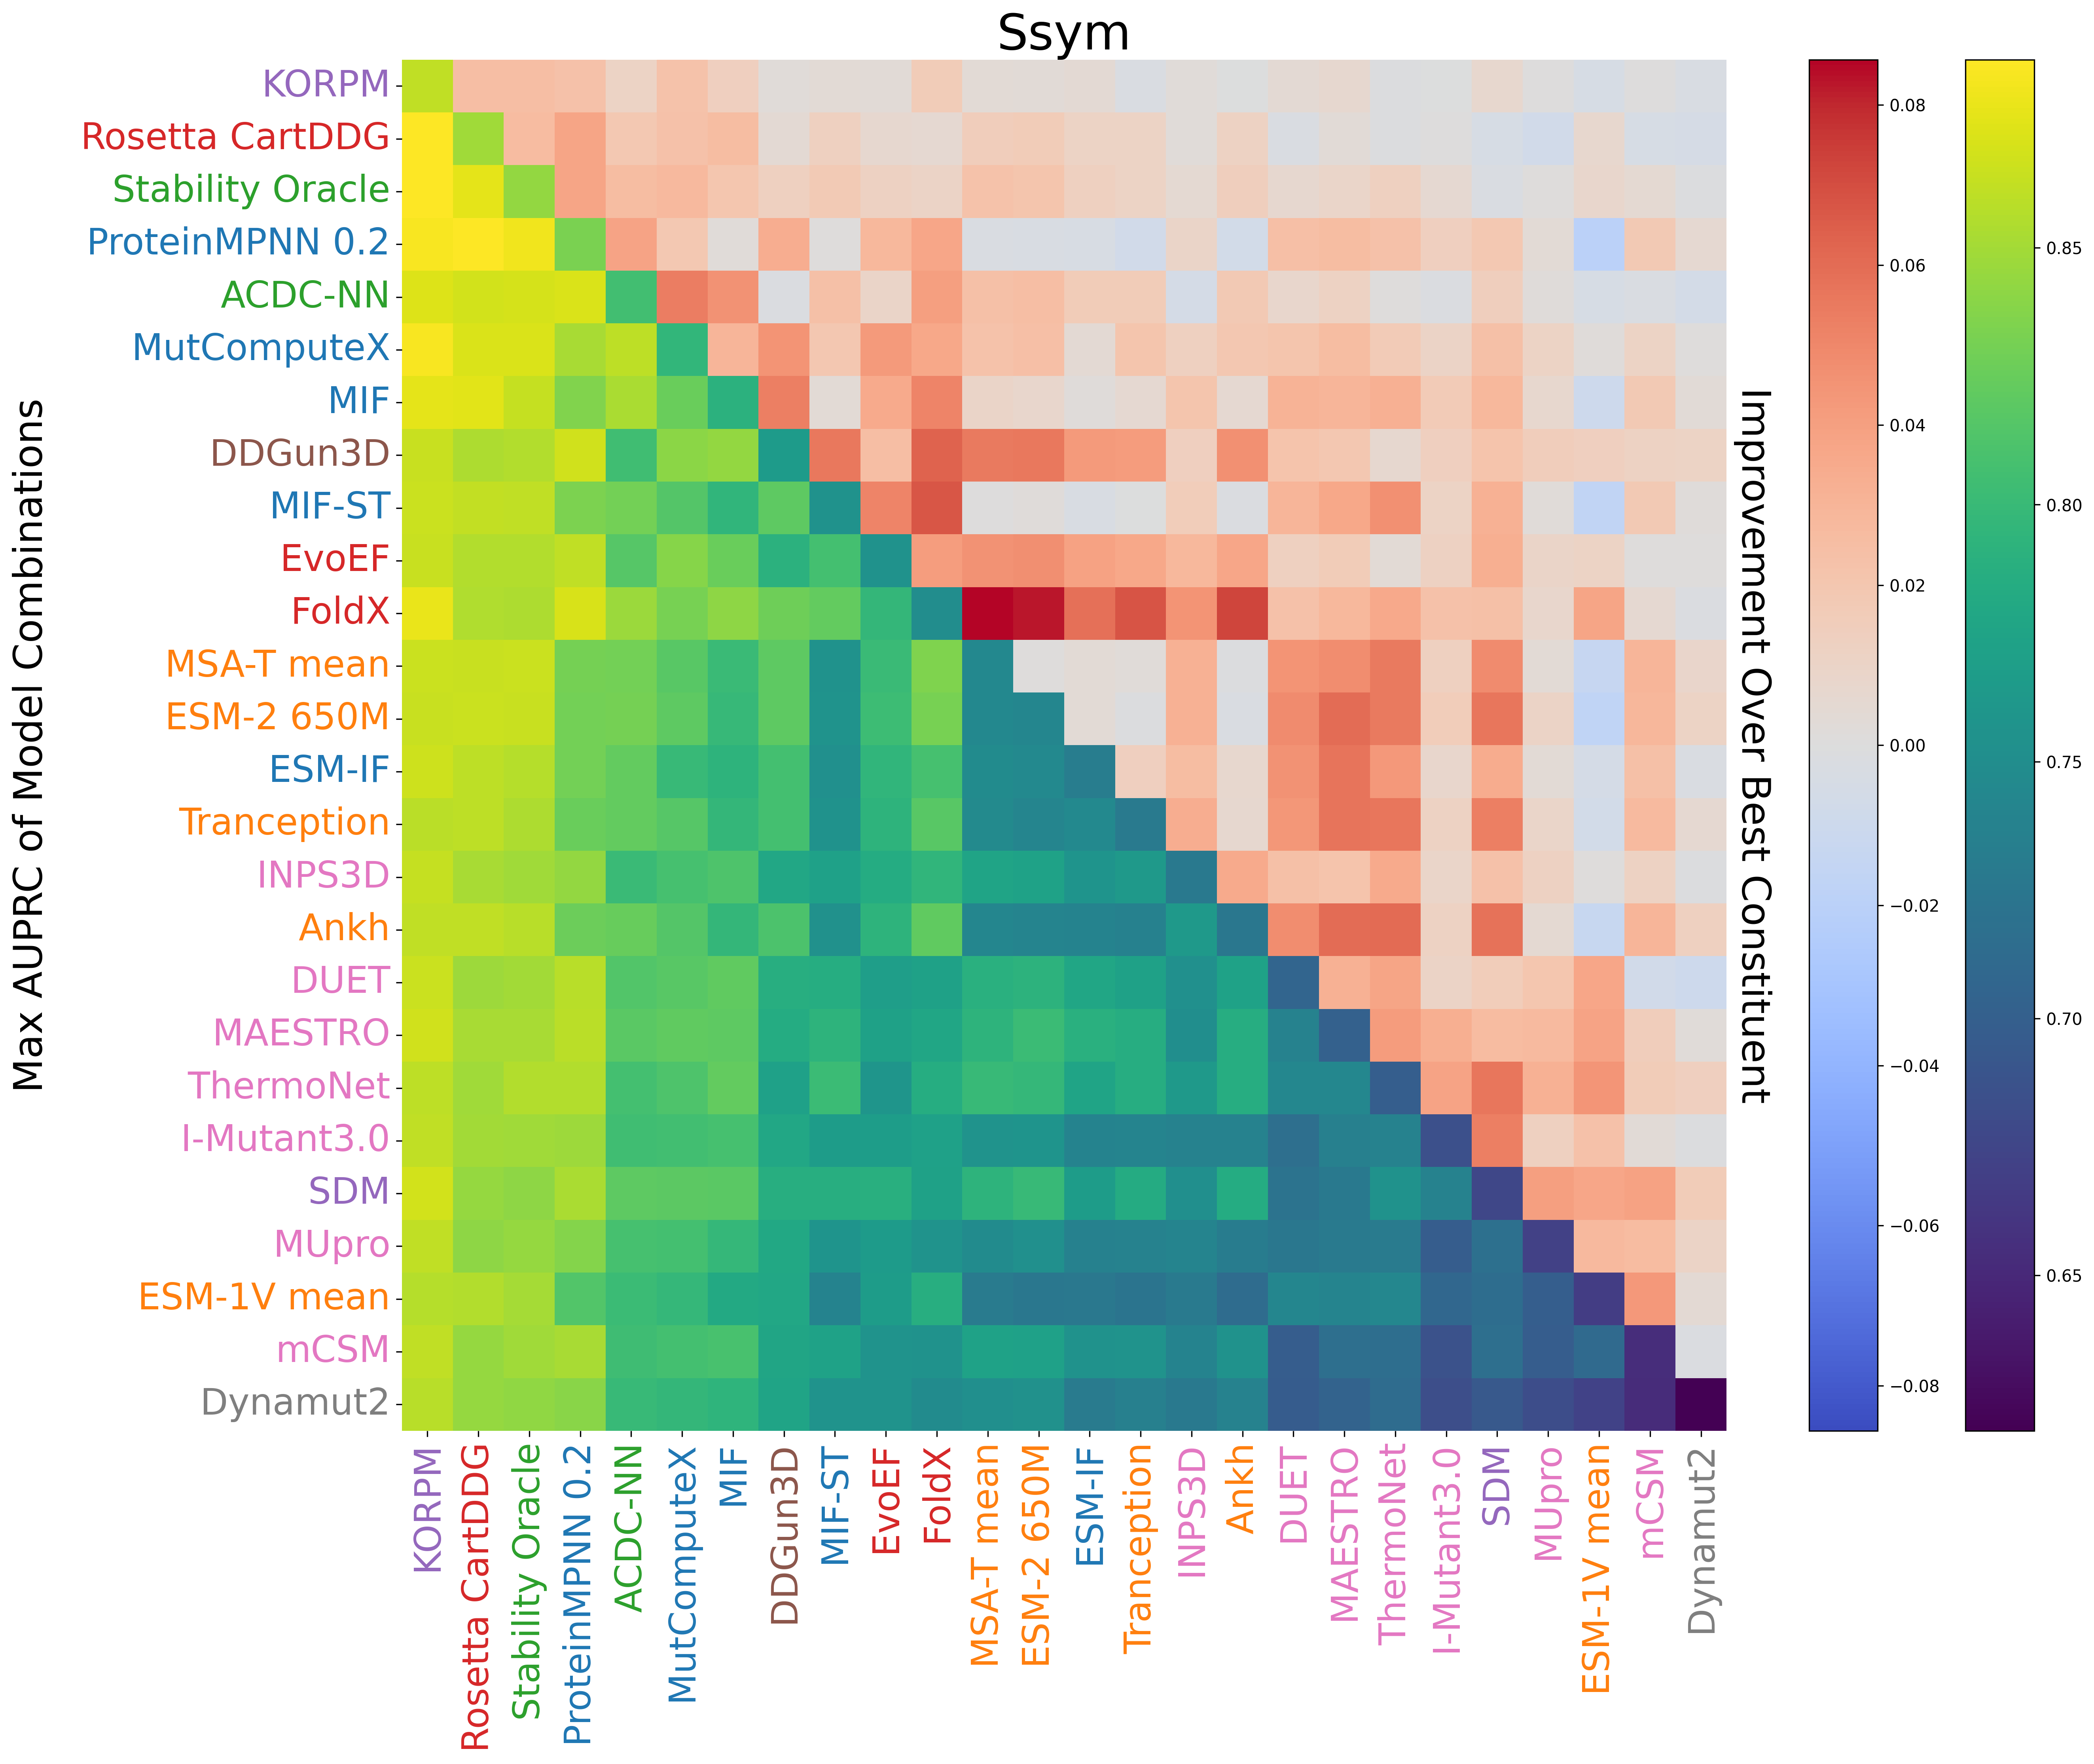

Base model       Added Model  Weight  AUPRC  Model Correlation  \
Rank                                                                         
1      Rosetta CartDDG   ProteinMPNN 0.2     0.5   0.89               0.63   
2                KORPM  Stability Oracle     1.0   0.89               0.62   
3                KORPM   Rosetta CartDDG     1.0   0.89               0.66   
4                KORPM   ProteinMPNN 0.2     0.5   0.88               0.71   
5                KORPM       MutComputeX     0.5   0.88               0.45   
6      ProteinMPNN 0.2  Stability Oracle     1.0   0.88               0.59   
7                KORPM             FoldX     0.5   0.88               0.45   
8      Rosetta CartDDG  Stability Oracle     1.0   0.88               0.70   
9                KORPM               MIF     0.5   0.88               0.59   
10     Rosetta CartDDG               MIF     0.5   0.87               0.57   
11               KORPM           ACDC-NN     0.5   0.87               0.68   
12     Rosetta CartDDG       MutComputeX     0.5   0.87               0.48   
13             ACDC-NN   ProteinMPNN 0.2     1.0   0.87               0.58   
14    Stability Oracle       MutComputeX     0.5   0.87               0.51   
15               FoldX   ProteinMPNN 0.2     1.0   0.87               0.48   
16             ACDC-NN  Stability Oracle     1.0   0.87               0.55   
17             ACDC-NN   Rosetta CartDDG     1.0   0.87               0.60   
18               KORPM               SDM     0.2   0.87               0.32   
19               KORPM           MAESTRO     0.2   0.87               0.41   
20             DDGun3D   ProteinMPNN 0.2     1.0   0.87               0.47   
21               KORPM            ESM-IF     0.2   0.87               0.59   
22    Stability Oracle        MSA-T mean     0.5   0.87               0.35   
23     Rosetta CartDDG        ESM-2 650M     0.2   0.87               0.42   
24               KORPM              DUET     0.2   0.87               0.41   
25               KORPM            MIF-ST     0.2   0.87               0.67   
26               KORPM        MSA-T mean     0.2   0.86               0.66   
27               KORPM             EvoEF     0.2   0.86               0.57   
28               KORPM        ESM-2 650M     0.2   0.86               0.66   
29    Stability Oracle        ESM-2 650M     0.5   0.86               0.36   
30               KORPM           DDGun3D     0.2   0.86               0.68   

      CPU time (s)  GPU time (s)  
Rank                              
1         125192.0          5.98  
2             -0.0         -0.00  
3         125192.0         -0.00  
4             -0.0          5.98  
5             -0.0         -0.00  
6             -0.0          5.98  
7             -0.0         -0.00  
8         125192.0         -0.00  
9             -0.0          6.58  
10        125192.0          6.58  
11            -0.0         -0.00  
12        125192.0         -0.00  
13            -0.0          5.98  
14            -0.0         -0.00  
15            -0.0          5.98  
16            -0.0         -0.00  
17        125192.0         -0.00  
18            -0.0         -0.00  
19            -0.0         -0.00  
20            -0.0          5.98  
21            -0.0         87.41  
22            -0.0       4845.43  
23        125192.0         31.94  
24            -0.0         -0.00  
25            -0.0         21.79  
26            -0.0       4845.43  
27            -0.0         -0.00  
28            -0.0         31.94  
29            -0.0         31.94  
30            -0.0         -0.00

In [13]:
importlib.reload(analysis_utils)

direction = 'combined'
statistic = 'auprc'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym')
stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename(
    {'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 
    'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 
    'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho', 'auprc': 'AUPRC', 'net_stabilization': 'Net Stabilization'}, axis=1).set_index('Rank')
stat_df_.head(30)

In [14]:
supp = d1.xs('dir')[['auprc', 'mean_stabilization', 'net_stabilization', 'weighted_ndcg', 'weighted_spearman', 'auppc', 'aumsc', 'antisymmetry', 'bias']].reset_index().drop(['model_type', 'class'], axis=1)#.set_index('model')
selection = {'INPS3D', 'DDGun', 'PremPS', 'mif', 'DDGun3D', 'esmif_monomer', 'esm1v_mean', 'mpnn_mean', 'msa_transformer_mean', 'DUET', 'Dynamut', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq',
'tranception', 'PopMusic', 'MAESTRO', 'mifst', 'SOL_ACC', 'korpm', 'mpnn_20_00', 'esmif_multimer', 'ACDC-NN', 'cartesian_ddg', 'SAAFEC-Seq', 'SDM', 'SOL_ACC', 'ThermoNet', 'mCSM', 'ddG'}
supp[['model1', 'weight1', 'model2', 'weight2']] = supp['model'].apply(analysis_utils.process_index).apply(pd.Series)
supp = supp.loc[supp['model1'].isin(selection) & supp['model2'].isin(selection)]
df1 = analysis_utils.get_stat_df(supp, 'weighted_ndcg', new_dir='dir')
df2 = analysis_utils.get_stat_df(supp, 'auppc', new_dir='dir')
df3 = analysis_utils.get_stat_df(supp, 'net_stabilization', new_dir='dir')

assert len(df1)==len(df2)
assert len(df2)==len(df3)

#df_merged = df1.merge(df2, how='outer', on=['model1', 'weight1', 'model2', 'weight2']).merge(df3, how='outer', on=['model1', 'weight1', 'model2', 'weight2'])
df_merged = pd.concat([df1, df2['auppc'], df3['net_stabilization']], axis=1)
df_merged = df_merged.loc[(df_merged['model1']!='ddG')&(df_merged['model1']!='PremPS')]

df_merged['models'] = df_merged.apply(lambda row: set([row['model1'], row['model2']]), axis=1)
df_merged['models'] = df_merged['models'].apply(frozenset)

idx1 = df_merged.groupby('models')['weighted_ndcg'].idxmax()
idx2 = df_merged.groupby('models')['auppc'].idxmax()
idx3 = df_merged.groupby('models')['net_stabilization'].idxmax()

df_merged_2 = pd.concat([df_merged.loc[idx1], df_merged.loc[idx2], df_merged.loc[idx3]]).drop_duplicates()

dd1 = df_merged_2.sort_values('weighted_ndcg', ascending=False).head(10) #16
dd2 = df_merged_2.sort_values('auppc', ascending=False).head(10)
dd3 = df_merged_2.sort_values('net_stabilization', ascending=False).head(10)
dd = pd.concat([dd1, dd2, dd3]).drop_duplicates().drop('models', axis=1)
dd['model1'] = dd['model1'].replace(remap_names)
dd['model2'] = dd['model2'].replace(remap_names)
dd = dd.drop('weight1', axis=1)
dd.columns = ['Model 1', 'Model 2', 'Weight 2', 'wNDCG', 'AUPPC', 'Net Stabilization']
print(len(dd))
dd

22


Model 1          Model 2  Weight 2     wNDCG     AUPPC  \
143  I-Mutant3.0-Seq           PremPS       0.2  0.839730  0.063438   
50   I-Mutant3.0-Seq          ACDC-NN       0.5  0.838460  0.067922   
29   I-Mutant3.0-Seq  Rosetta CartDDG       0.2  0.838190  0.063948   
144  I-Mutant3.0-Seq              SDM       0.2  0.835371  0.059729   
149  I-Mutant3.0-Seq            KORPM       0.2  0.834401  0.067433   
141  I-Mutant3.0-Seq           INPS3D       0.5  0.834074  0.067659   
107  I-Mutant3.0-Seq             DUET       0.2  0.834008  0.060566   
142  I-Mutant3.0-Seq          MAESTRO       0.2  0.831889  0.061905   
28       I-Mutant3.0  Rosetta CartDDG       1.0  0.831853  0.061043   
150  I-Mutant3.0-Seq             mCSM       0.5  0.831249  0.059304   
16             FoldX            KORPM       1.0  0.738916  0.067654   
89   I-Mutant3.0-Seq          DDGun3D       0.2  0.828396  0.067247   
157          MAESTRO           INPS3D       0.5  0.772583  0.067187   
125      I-Mutant3.0           INPS3D       0.5  0.816099  0.066689   
159           INPS3D              SDM       0.5  0.737630  0.066487   
30   Rosetta CartDDG           INPS3D       0.2  0.770819  0.066429   
24   Rosetta CartDDG          ACDC-NN       0.2  0.765847  0.066295   
6        I-Mutant3.0            FoldX       0.5  0.775538  0.056479   
7    I-Mutant3.0-Seq            FoldX       0.2  0.808415  0.063889   
5               DUET            FoldX       0.5  0.730514  0.042453   
38   Rosetta CartDDG            KORPM       0.2  0.767821  0.065083   
20             FoldX  ProteinMPNN 0.2       0.5  0.721119  0.046795   

     Net Stabilization  
143             37.020  
50              24.040  
29              30.151  
144             21.231  
149             23.100  
141             25.001  
107             27.740  
142             22.701  
28              32.481  
150             21.049  
16              32.760  
89              18.940  
157             10.000  
125             21.391  
159              6.851  
30              23.851  
24              20.191  
6               30.920  
7               29.430  
5               29.190  
38              28.691  
20              26.420

In [15]:
supp = d1.xs('combined')[['auprc', 'weighted_ndcg', 'weighted_spearman', 'mean_stabilization', 'net_stabilization', 'auppc', 'aumsc']].reset_index().drop(['model_type', 'class'], axis=1)
selection = {'INPS3D', 'DDGun', 'PremPS', 'mif', 'DDGun3D', 'esmif_monomer', 'esm1v_mean', 'mpnn_mean', 'msa_transformer_mean', 'DUET', 'Dynamut', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq',
'tranception', 'PopMusic', 'MAESTRO', 'mifst', 'SOL_ACC', 'korpm', 'mpnn_20_00', 'esmif_multimer', 'ACDC-NN', 'cartesian_ddg', 'SAAFEC-Seq', 'SDM', 'SOL_ACC', 'ThermoNet', 'mCSM', 'ddG'}
supp[['model1', 'weight1', 'model2', 'weight2']] = supp['model'].apply(analysis_utils.process_index).apply(pd.Series)
supp = supp.loc[supp['model1'].isin(selection) & supp['model2'].isin(selection)]
df1 = analysis_utils.get_stat_df(supp, 'weighted_ndcg', new_dir='')
df2 = analysis_utils.get_stat_df(supp, 'auppc', new_dir='')
df3 = analysis_utils.get_stat_df(supp, 'net_stabilization', new_dir='')

assert len(df1)==len(df2)
assert len(df2)==len(df3)

#df_merged = df1.merge(df2, how='outer', on=['model1', 'weight1', 'model2', 'weight2']).merge(df3, how='outer', on=['model1', 'weight1', 'model2', 'weight2'])
df_merged = pd.concat([df1, df2['auppc'], df3['net_stabilization']], axis=1)
df_merged = df_merged.loc[(df_merged['model1']!='ddG')&(df_merged['model1']!='PremPS')]

df_merged['models'] = df_merged.apply(lambda row: set([row['model1'], row['model2']]), axis=1)
df_merged['models'] = df_merged['models'].apply(frozenset)

idx1 = df_merged.groupby('models')['weighted_ndcg'].idxmax()
idx2 = df_merged.groupby('models')['auppc'].idxmax()
idx3 = df_merged.groupby('models')['net_stabilization'].idxmax()

df_merged_2 = pd.concat([df_merged.loc[idx1], df_merged.loc[idx2], df_merged.loc[idx3]]).drop_duplicates()

dd1 = df_merged_2.sort_values('weighted_ndcg', ascending=False).head(10) #16
dd2 = df_merged_2.sort_values('auppc', ascending=False).head(10)
dd3 = df_merged_2.sort_values('net_stabilization', ascending=False).head(10)
dd = pd.concat([dd1, dd2, dd3]).drop_duplicates().drop('models', axis=1)
dd['model1'] = dd['model1'].replace(remap_names)
dd['model2'] = dd['model2'].replace(remap_names)
dd = dd.drop('weight1', axis=1)
dd.columns = ['Model 1', 'Model 2', 'Weight 2', 'wNDCG', 'AUPPC', 'Net Stabilization']
print(len(dd))
dd

26


Model 1                Model 2  Weight 2     wNDCG     AUPPC  \
178            KORPM                MAESTRO       0.5  0.896518  0.447761   
38   Rosetta CartDDG                  KORPM       0.5  0.884911  0.454668   
91           DDGun3D                MAESTRO       0.5  0.880485  0.429935   
31   Rosetta CartDDG                MAESTRO       0.5  0.880379  0.425786   
72             DDGun                MAESTRO       0.5  0.880253  0.436462   
43   Rosetta CartDDG             MSA-T mean       0.2  0.880244  0.457445   
41   Rosetta CartDDG                 MIF-ST       0.2  0.880185  0.449933   
30   Rosetta CartDDG                 INPS3D       0.2  0.879292  0.436617   
2            ACDC-NN                  FoldX       0.5  0.878050  0.451317   
37   Rosetta CartDDG                 ESM-IF       0.2  0.877129  0.436873   
63           ACDC-NN        ProteinMPNN 0.2       1.0  0.872726  0.471603   
64           ACDC-NN             MSA-T mean       0.5  0.858144  0.469184   
83             DDGun        ProteinMPNN 0.2       1.0  0.856726  0.465836   
102          DDGun3D        ProteinMPNN 0.2       0.5  0.866001  0.465340   
62           ACDC-NN                 MIF-ST       0.5  0.861070  0.461690   
61           ACDC-NN                    MIF       0.2  0.860277  0.461334   
65           ACDC-NN  Tranception (reduced)       0.5  0.828952  0.460965   
59           ACDC-NN                  KORPM       0.2  0.845303  0.459207   
84             DDGun             MSA-T mean       1.0  0.855611  0.458686   
103          DDGun3D             MSA-T mean       0.5  0.849584  0.458246   
16             FoldX                  KORPM       1.0  0.866992  0.440520   
251            KORPM                 MIF-ST       1.0  0.841979  0.448530   
254            KORPM  Tranception (reduced)       1.0  0.811466  0.444988   
271       MSA-T mean        ProteinMPNN 0.2       0.5  0.805406  0.449684   
264       MSA-T mean                    MIF       0.2  0.813188  0.438644   
98           DDGun3D                  KORPM       1.0  0.846544  0.446783   

     Net Stabilization  
178            320.571  
38             349.913  
91             237.352  
31             276.083  
72             251.351  
43             337.181  
41             321.463  
30             289.412  
2              320.161  
37             291.423  
63             342.343  
64             343.161  
83             338.592  
102            337.593  
62             318.133  
61             316.683  
65             336.121  
59             350.403  
84             338.641  
103            341.381  
16             352.481  
251            346.702  
254            344.751  
271            343.501  
264            342.511  
98             342.121

In [16]:
"""
rand = class_result.reset_index()
rand = rand.loc[rand['model'].str.contains('random')]
rand['model'] = 'random'
rand['model_type'] = np.nan
rand = rand.set_index(['direction', 'model_type', 'model'])
dr = pd.concat([d1.reset_index(), rand.reset_index()])
dr = dr.set_index(['direction', 'model_type', 'model'])
"""

"\nrand = class_result.reset_index()\nrand = rand.loc[rand['model'].str.contains('random')]\nrand['model'] = 'random'\nrand['model_type'] = np.nan\nrand = rand.set_index(['direction', 'model_type', 'model'])\ndr = pd.concat([d1.reset_index(), rand.reset_index()])\ndr = dr.set_index(['direction', 'model_type', 'model'])\n"

In [17]:
d4 = d1.reset_index()
d4.loc[d4['model'].isin([f'random_{i}' for i in range(1,6)]), 'model'] = 'random'
d4 = d4.set_index(['direction', 'model_type', 'model'])
d4

class      n     tp     fp  \
direction model_type  model                                                     
combined  NaN         Cartddg                        NaN  684.0  198.0   42.0   
          biophysical Evo                            NaN  684.0  209.0  102.0   
                      FoldX                          NaN  684.0  206.0   80.0   
                      cartesian_ddg                  NaN  684.0  210.0   44.0   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2    NaN  684.0  240.0  102.0   
...                                                  ...    ...    ...    ...   
inv       unknown     Dynamut2                       NaN  342.0   44.0   21.0   
                      ddG                            NaN  342.0  253.0    0.0   
                      random                         NaN  342.0  120.0   51.0   
          untrained   DDGun                          NaN  342.0  187.0   49.0   
                      DDGun3D                        NaN  342.0  181.0   37.0   

                                                      tn     fn  sensitivity  \
direction model_type  model                                                    
combined  NaN         Cartddg                      300.0  144.0     0.578947   
          biophysical Evo                          240.0  133.0     0.611111   
                      FoldX                        262.0  136.0     0.602339   
                      cartesian_ddg                298.0  132.0     0.614035   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2  240.0  102.0     0.701754   
...                                                  ...    ...          ...   
inv       unknown     Dynamut2                      68.0  209.0     0.173913   
                      ddG                           89.0    0.0     1.000000   
                      random                        38.0  133.0     0.474308   
          untrained   DDGun                         40.0   66.0     0.739130   
                      DDGun3D                       52.0   72.0     0.715415   

                                                   specificity       PPV  \
direction model_type  model                                                
combined  NaN         Cartddg                         0.877193  0.825000   
          biophysical Evo                             0.701754  0.672026   
                      FoldX                           0.766082  0.720280   
                      cartesian_ddg                   0.871345  0.826772   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2     0.701754  0.701754   
...                                                        ...       ...   
inv       unknown     Dynamut2                        0.764045  0.676923   
                      ddG                             1.000000  1.000000   
                      random                          0.426966  0.701754   
          untrained   DDGun                           0.449438  0.792373   
                      DDGun3D                         0.584270  0.830275   

                                                   pred_positives_ratio  ...  \
direction model_type  model                                              ...   
combined  NaN         Cartddg                                  0.701754  ...   
          biophysical Evo                                      0.909357  ...   
                      FoldX                                    0.836257  ...   
                      cartesian_ddg                            0.742690  ...   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2              1.000000  ...   
...                                                                 ...  ...   
inv       unknown     Dynamut2                                 0.256917  ...   
                      ddG                                      1.000000  ...   
                      random                                   0.675889  ...   
          untrained   DDGun                                    0.932806  ...   
       

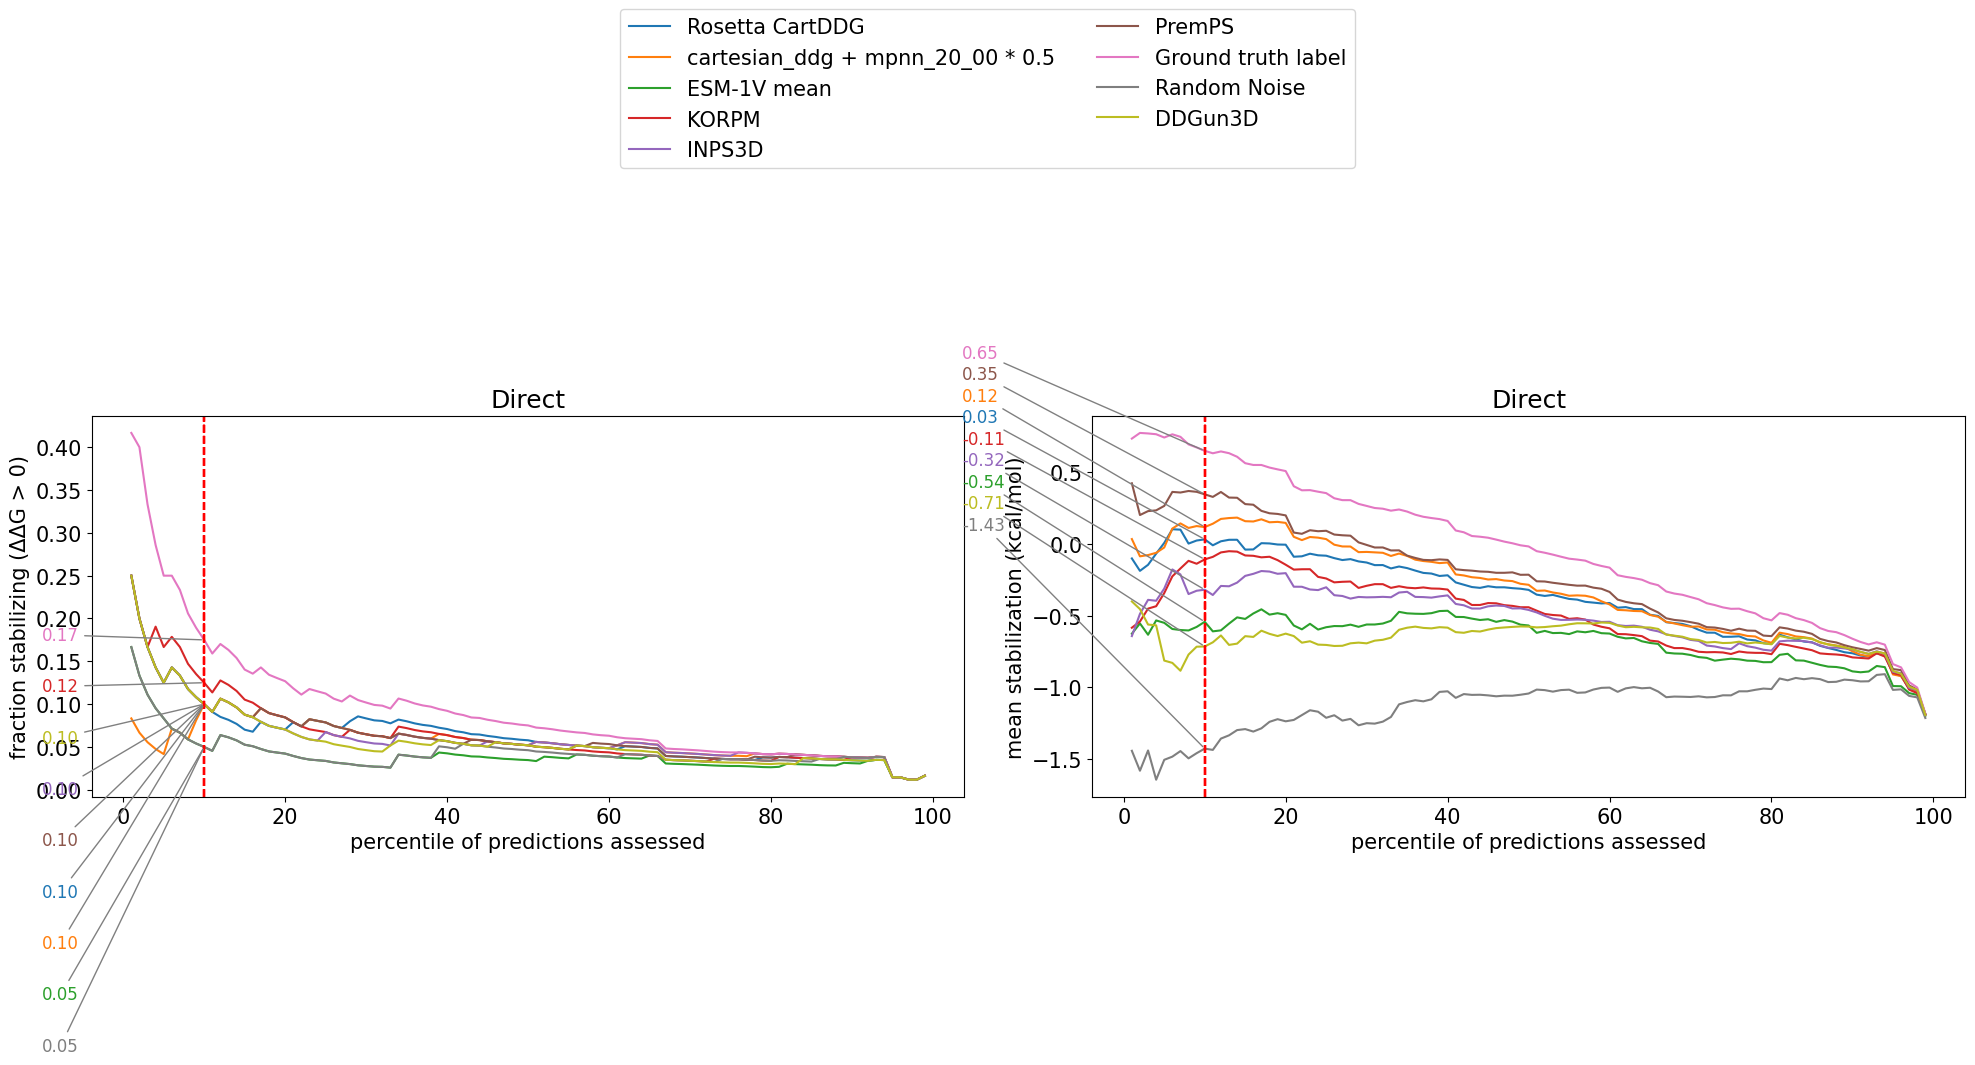

In [18]:
analysis_utils.recovery_curves_2(d4, ['q3421_rfa_5', 'cartesian_ddg + mpnn_20_00 * 0.5', 'mpnn_20_00' 'PremPS', 'cartesian_ddg', 'esm1v_mean', 'PremPS', 'korpm', 'DDGun3D', 'INPS3D', 'ddG', 'random'], percentile_labels=[10], directions=['dir'])

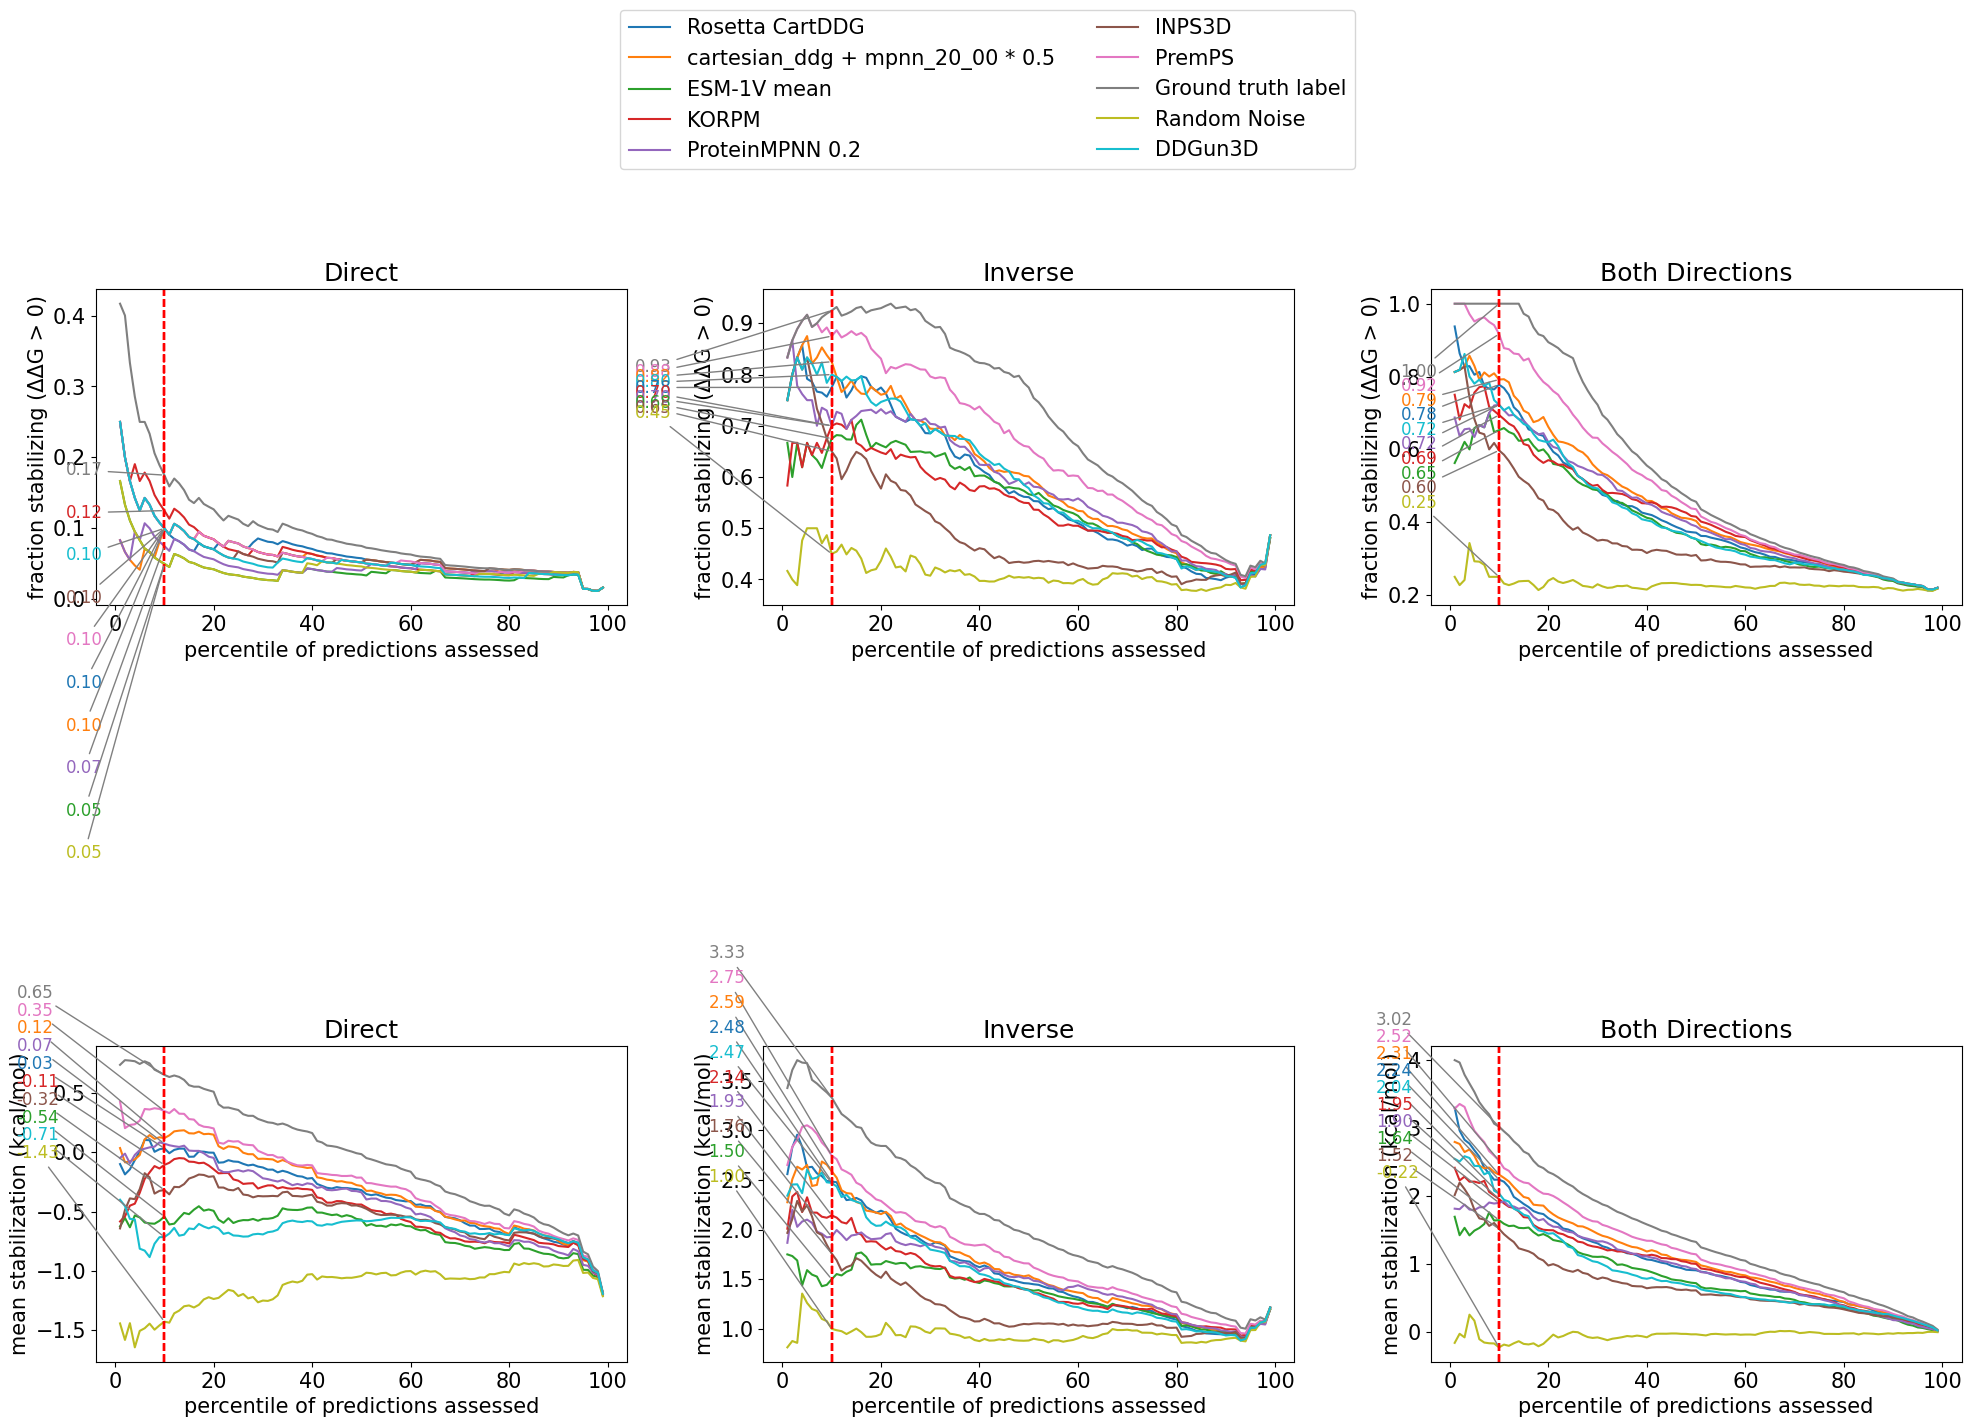

In [19]:
analysis_utils.recovery_curves_2(d4, ['cartesian_ddg + mpnn_20_00 * 0.5', 'mpnn_20_00', 'PremPS', 'cartesian_ddg', 'esm1v_mean', 'PremPS', 'korpm', 'DDGun3D', 'INPS3D', 'ddG', 'random'], directions=['dir', 'inv'], percentile_labels=[10])

In [20]:
d4 = d1.reset_index()
d4 = d4.loc[~d4['model'].str.contains('ddG +')]
d4 = d4.set_index(['direction', 'model'])
d4.xs('dir')

model_type  class      n    tp     fp     tn  \
model                                                                        
Cartddg                              NaN    NaN  342.0  50.0   21.0  232.0   
Evo                          biophysical    NaN  342.0  55.0   63.0  190.0   
FoldX                        biophysical    NaN  342.0  68.0   66.0  187.0   
cartesian_ddg                biophysical    NaN  342.0  49.0   24.0  229.0   
ACDC-NN + ACDC-NN-Seq * 0.2     ensemble    NaN  342.0  39.0   52.0  201.0   
...                                  ...    ...    ...   ...    ...    ...   
Dynamut2                         unknown    NaN  342.0  28.0   18.0  235.0   
ddG                              unknown    NaN  342.0  89.0    0.0  253.0   
random                           unknown    NaN  342.0  35.0  122.0  131.0   
DDGun                          untrained    NaN  342.0  35.0   56.0  197.0   
DDGun3D                        untrained    NaN  342.0  40.0   60.0  193.0   

                               fn  sensitivity  specificity       PPV  ...  \
model                                                                  ...   
Cartddg                      39.0     0.561798     0.916996  0.704225  ...   
Evo                          34.0     0.617978     0.750988  0.466102  ...   
FoldX                        21.0     0.764045     0.739130  0.507463  ...   
cartesian_ddg                40.0     0.550562     0.905138  0.671233  ...   
ACDC-NN + ACDC-NN-Seq * 0.2  50.0     0.438202     0.794466  0.428571  ...   
...                           ...          ...          ...       ...  ...   
Dynamut2                     61.0     0.314607     0.928854  0.608696  ...   
ddG                           0.0     1.000000     1.000000  1.000000  ...   
random                       54.0     0.393258     0.517787  0.222930  ...   
DDGun                        54.0     0.393258     0.778656  0.384615  ...   
DDGun3D                      49.0     0.449438     0.762846  0.400000  ...   

                                  93$       94$       95$       96$       97$  \
model                                                                           
Cartddg                     -0.771577 -0.776288 -0.894931 -0.901489 -1.000440   
Evo                         -0.773325 -0.786358 -0.905150 -0.919605 -1.005996   
FoldX                       -0.783255 -0.793788 -0.900770 -0.916344 -0.983774   
cartesian_ddg               -0.762136 -0.774899 -0.901500 -0.919243 -1.007187   
ACDC-NN + ACDC-NN-Seq * 0.2 -0.742556 -0.759969 -0.885807 -0.906924 -0.996472   
...                               ...       ...       ...       ...       ...   
Dynamut2                    -0.755843 -0.760316 -0.886536 -0.892793 -1.000440   
ddG                         -0.684864 -0.701288 -0.836901 -0.859822 -0.961948   
random                      -0.912486 -0.907191 -1.016828 -1.013083 -1.058774   
DDGun                       -0.763920 -0.775628 -0.894967 -0.910583 -0.998456   
DDGun3D                     -0.750248 -0.761705 -0.884347 -0.904750 -0.994488   

                                  98$       99$     aumsc  antisymmetry  bias  
model                                                                          
Cartddg                     -1.028671 -1.182191 -0.375254           NaN   NaN  
Evo                         -1.032984 -1.196945 -0.606255           NaN   NaN  
FoldX                       -1.016122 -1.196945 -0.418319           NaN   NaN  
cartesian_ddg               -1.030631 -1.185470 -0.368520           NaN   NaN  
ACDC-NN + ACDC-NN-Seq * 0.2 -1.020827 -1.192027 -0.569504           NaN   NaN  
...                               ...       ...       ...           ...   ...  
Dynamut2                    -1.026318 -1.184377 -0.518438           NaN   NaN  
ddG                         -1.000827 -1.182191 -0.029107           NaN   NaN  
random                      -1.069063 -1.212792 -1.124216           NaN   NaN  
DDGun                       -1.020827 -1.192027 -0.660121         

In [21]:
pd.concat([d4.xs('dir').sort_values('10%', ascending=False).head(10)[['10%', '10$', 'net_stabilization']], d4.xs('dir').sort_values('10$', ascending=False).head(10).tail(9)[['10%', '10$', 'net_stabilization']]])

10%       10$  net_stabilization
model                                                                
ddG                                0.175  0.650500             57.531
MUpro + INPS3D * 0.5               0.125  0.272250             30.130
korpm + K1566_pslm_rfa_3 * 0.2     0.125 -0.095225              2.691
korpm + K1566_pslm_rfa_4 * 0.5     0.125  0.027275             10.101
korpm + K1566_pslm_rfa_4 * 0.2     0.125 -0.087725              7.841
Cartddg + stability-oracle * 0.2   0.125  0.049000             26.981
cluster + stability-oracle * 0.5   0.125  0.154500           -337.241
ACDCNN + MUpro * 0.5               0.125  0.170250             20.911
ACDCNN + MUpro * 1                 0.125  0.241000             29.811
cluster + stability-oracle * 1     0.125  0.154500           -275.641
PremPS + SAAFEC-SEQ * 1            0.100  0.434500             38.270
SAAFEC-SEQ + PremPS * 1            0.100  0.434500             38.270
SAAFEC-SEQ + esmif_multimer * 0.2  0.100  0.426250             34.620
MUpro + PremPS * 1                 0.125  0.403500             39.220
PremPS + MUpro * 1                 0.125  0.403500             39.220
PremPS + mpnn_10_00 * 0.5          0.075  0.397250             31.620
SAAFEC-SEQ + esmif_multimer * 0.5  0.100  0.396250             23.820
PremPS + MUpro * 0.5               0.125  0.389750             41.220
mutcomputex + PremPS * 1           0.100  0.383250             32.580